In [ ]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iranian+churn+dataset (1).zip to iranian+churn+dataset (1).zip


In [ ]:
data= pd.read_csv('iranian+churn+dataset (1).zip')
data

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1                318                 5                 7   
2               2453                60               359   
3               4198                66                 1   
4               2393                58                 2   
...              ...               ...               ...   
3145            6697               147                92   
3146            9237               177                80   
3147            3157                51                38   
3148            4695                46               222   
3149            1792                25                 7   

      Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                          17          3            1       1   30   
1                           4          2            1       2   25   
2                          24          3            1       1   30   
3                          35          1            1       1   15   
4                          33          1            1       1   15   
...                       ...        ...          ...     ...  ...   
3145                       44          2            2       1   25   
3146                       42          5            1       1   55   
3147                       21          3            1       1   30   
3148                       12          3            1       1   30   
3149                        9          3            1       1   30   

      Customer Value  Churn  
0            197.640      0  
1             46.035      0  
2           1536.520      0  
3            240.020      0  
4            145.805      0  
...              ...    ...  
3145         721.980      0  
3146         261.210      0  
3147         280.320      0  
3148        1077.640      0  
3149         100.680      1  

[3150 rows x 14 columns]

In [ ]:
print(data)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1              

Data Preprocessing, Check the following:

1.Missing Value
2.All values are in proper format or not
3.Non numeric value

In [ ]:
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
data.shape

(3150, 14)

In [ ]:
data.shape[1]

14

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[ 8  0 10  3 11  4 13  7  6  9 25  2 23 21  1 16 12 14 28  5 26 24 19 15
 22 20 18 17 30 27 29 31 33 35 32 34 36]
Call  Failure
0     702
5     244
7     166
6     161
8     156
9     149
3     141
2     137
4     133
11    125
10    124
1     121
13     99
12     97
14     85
15     69
16     67
18     53
17     45
20     37
19     33
21     29
23     25
25     21
22     21
28     17
26     17
24     16
30     16
27     13
32      8
29      7
31      6
33      3
34      3
35      2
36      2
Name: count, dtype: int64
[0 1]
Complains
0    2909
1     241
Name: count, dtype: int64
[38 39 37 33 36 34 35 31 27 26 25 18 17 15 16  9 40 41 29 28 20 19 11 32
 24 23 13 14  7 42 43 30 22 21 12  5 44 45 10  3  6  8  4 46 47]
Subscription  Length
36    276
38    258
37    229
35    228
34    201
39    201
40    186
33    152
32    121
41    110
31    104
30     80
42     80
29     73
28     59
27     57
43     56
25     52
26     45
44     44
24     41
23     39
17     32
15     31
18     31
16   

In [ ]:
data.iloc[:, 9] = data.iloc[:, 9].replace(2, 0)
data.iloc[:, 10] = data.iloc[:, 10].replace(2, 0)

In [ ]:
data= data.drop(['Age Group'], axis=1)

In [ ]:
for i in range(data.shape[1]):
  print(data.iloc[:,i].unique())
  print(data.iloc[:,i].value_counts())

[ 8  0 10  3 11  4 13  7  6  9 25  2 23 21  1 16 12 14 28  5 26 24 19 15
 22 20 18 17 30 27 29 31 33 35 32 34 36]
Call  Failure
0     702
5     244
7     166
6     161
8     156
9     149
3     141
2     137
4     133
11    125
10    124
1     121
13     99
12     97
14     85
15     69
16     67
18     53
17     45
20     37
19     33
21     29
23     25
25     21
22     21
28     17
26     17
24     16
30     16
27     13
32      8
29      7
31      6
33      3
34      3
35      2
36      2
Name: count, dtype: int64
[0 1]
Complains
0    2909
1     241
Name: count, dtype: int64
[38 39 37 33 36 34 35 31 27 26 25 18 17 15 16  9 40 41 29 28 20 19 11 32
 24 23 13 14  7 42 43 30 22 21 12  5 44 45 10  3  6  8  4 46 47]
Subscription  Length
36    276
38    258
37    229
35    228
34    201
39    201
40    186
33    152
32    121
41    110
31    104
30     80
42     80
29     73
28     59
27     57
43     56
25     52
26     45
44     44
24     41
23     39
17     32
15     31
18     31
16   

In [ ]:
data.describe()

Call  Failure    Complains  Subscription  Length  Charge  Amount  \
count    3150.000000  3150.000000           3150.000000     3150.000000   
mean        7.627937     0.076508             32.541905        0.942857   
std         7.263886     0.265851              8.573482        1.521072   
min         0.000000     0.000000              3.000000        0.000000   
25%         1.000000     0.000000             30.000000        0.000000   
50%         6.000000     0.000000             35.000000        0.000000   
75%        12.000000     0.000000             38.000000        1.000000   
max        36.000000     1.000000             47.000000       10.000000   

       Seconds of Use  Frequency of use  Frequency of SMS  \
count     3150.000000       3150.000000       3150.000000   
mean      4472.459683         69.460635         73.174921   
std       4197.908687         57.413308        112.237560   
min          0.000000          0.000000          0.000000   
25%       1391.250000         27.000000          6.000000   
50%       2990.000000         54.000000         21.000000   
75%       6478.250000         95.000000         87.000000   
max      17090.000000        255.000000        522.000000   

       Distinct Called Numbers  Tariff Plan       Status          Age  \
count              3150.000000  3150.000000  3150.000000  3150.000000   
mean                 23.509841     0.922222     0.751746    30.998413   
std                  17.217337     0.267864     0.432069     8.831095   
min                   0.000000     0.000000     0.000000    15.000000   
25%                  10.000000     1.000000     1.000000    25.000000   
50%                  21.000000     1.000000     1.000000    30.000000   
75%                  34.000000     1.000000     1.000000    30.000000   
max                  97.000000     1.000000     1.000000    55.000000   

       Customer Value        Churn  
count     3150.000000  3150.000000  
mean       470.972916     0.157143  
std        517.015433     0.363993  
min          0.000000     0.000000  
25%        113.801250     0.000000  
50%        228.480000     0.000000  
75%        788.388750     0.000000  
max       2165.280000     1.000000

In [ ]:
X=data.drop(['Churn'],axis=1)
print(X)
y = data['Churn']
print(y)

      Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0                 8          0                    38               0   
1                 0          0                    39               0   
2                10          0                    37               0   
3                10          0                    38               0   
4                 3          0                    38               0   
...             ...        ...                   ...             ...   
3145             21          0                    19               2   
3146             17          0                    17               1   
3147             13          0                    18               4   
3148              7          0                    11               2   
3149              8          1                    11               2   

      Seconds of Use  Frequency of use  Frequency of SMS  \
0               4370                71                 5   
1              

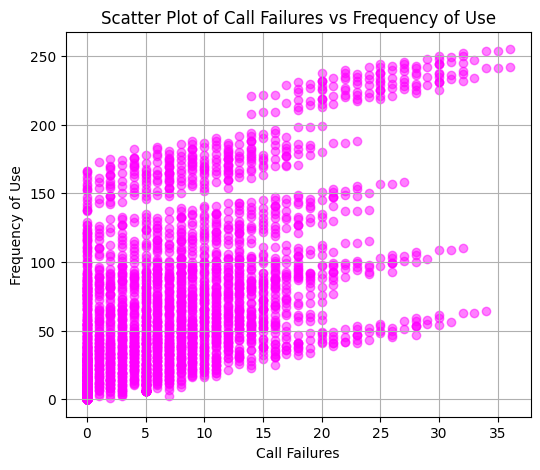

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(data['Call  Failure'], data['Frequency of use'], alpha=0.5, color='magenta')
plt.title('Scatter Plot of Call Failures vs Frequency of Use')
plt.xlabel('Call Failures')
plt.ylabel('Frequency of Use')
plt.grid(True)
plt.show()

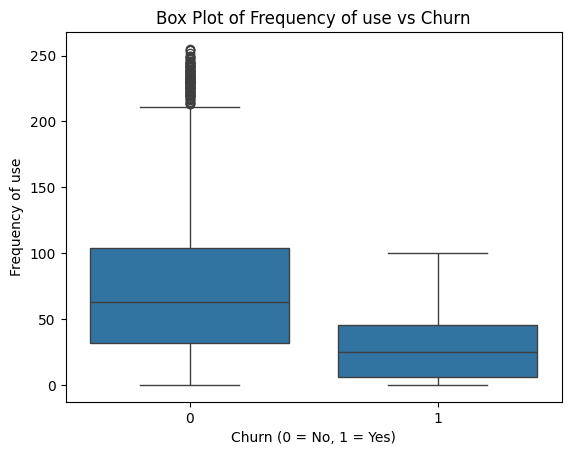

In [ ]:
sns.boxplot(x='Churn', y='Frequency of use', data=data)
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Frequency of use')
plt.title('Box Plot of Frequency of use vs Churn')
plt.show()

<ipython-input-19-e3e150b25826>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tariff Plan', data=data, palette='viridis')


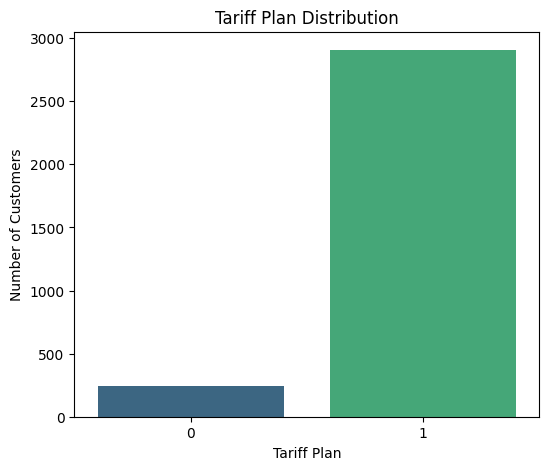

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Tariff Plan', data=data, palette='viridis')
plt.title('Tariff Plan Distribution')
plt.xlabel('Tariff Plan')
plt.ylabel('Number of Customers')
plt.show()

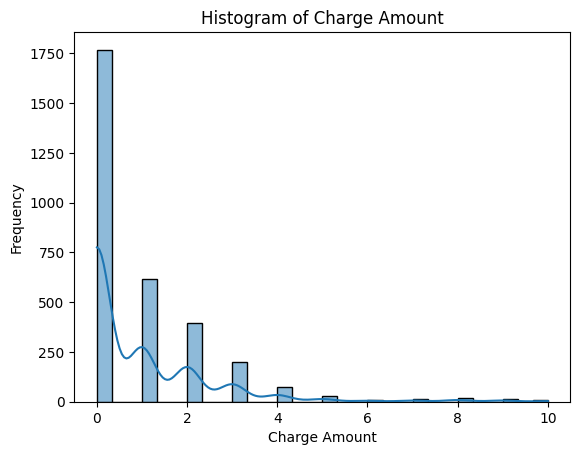

In [ ]:
sns.histplot(data['Charge  Amount'], bins=30, kde=True)
plt.xlabel('Charge Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Charge Amount')
plt.show()

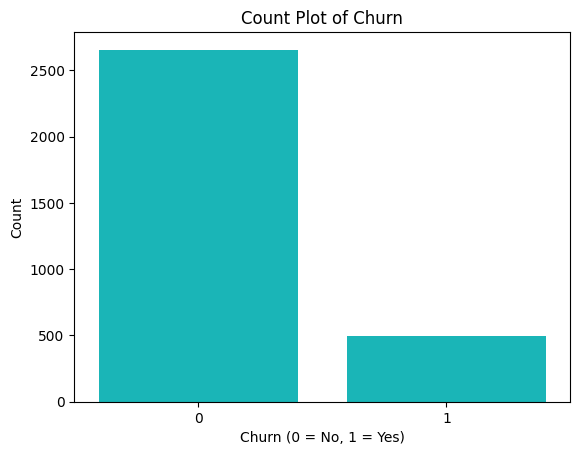

In [ ]:
sns.countplot(x='Churn', data=data,color='darkturquoise')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Count Plot of Churn')
plt.show()

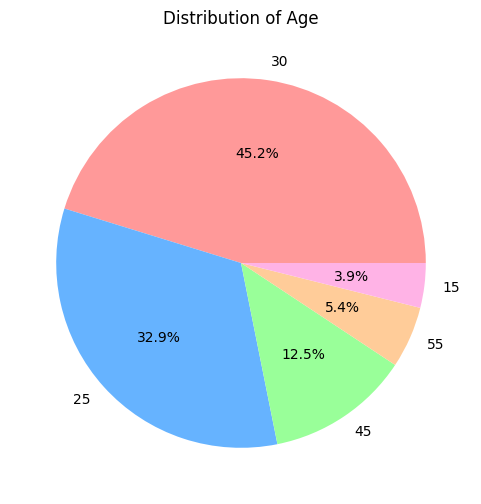

In [ ]:
Age_counts = data['Age'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(Age_counts, labels=Age_counts.index, autopct='%1.1f%%',colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffb3e6'])
plt.title('Distribution of Age')
plt.show()

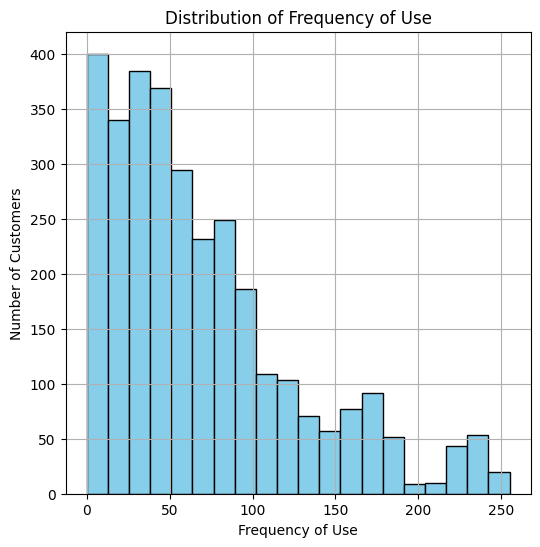

In [ ]:
plt.figure(figsize=(6,6))
plt.hist(data['Frequency of use'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Frequency of Use')
plt.xlabel('Frequency of Use')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

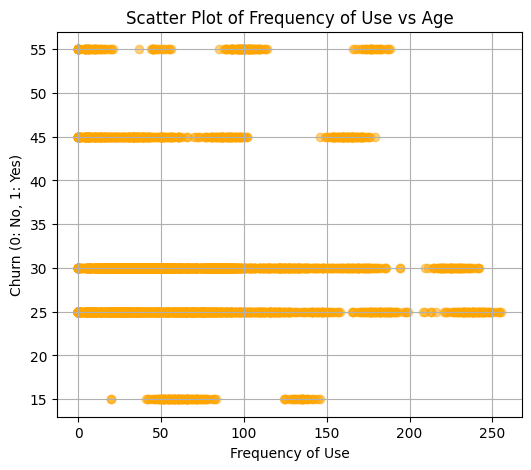

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(data['Frequency of use'], data['Age'], alpha=0.5, color='orange')
plt.title('Scatter Plot of Frequency of Use vs Age')
plt.xlabel('Frequency of Use')
plt.ylabel('Churn (0: No, 1: Yes)')
plt.grid(True)
plt.show()

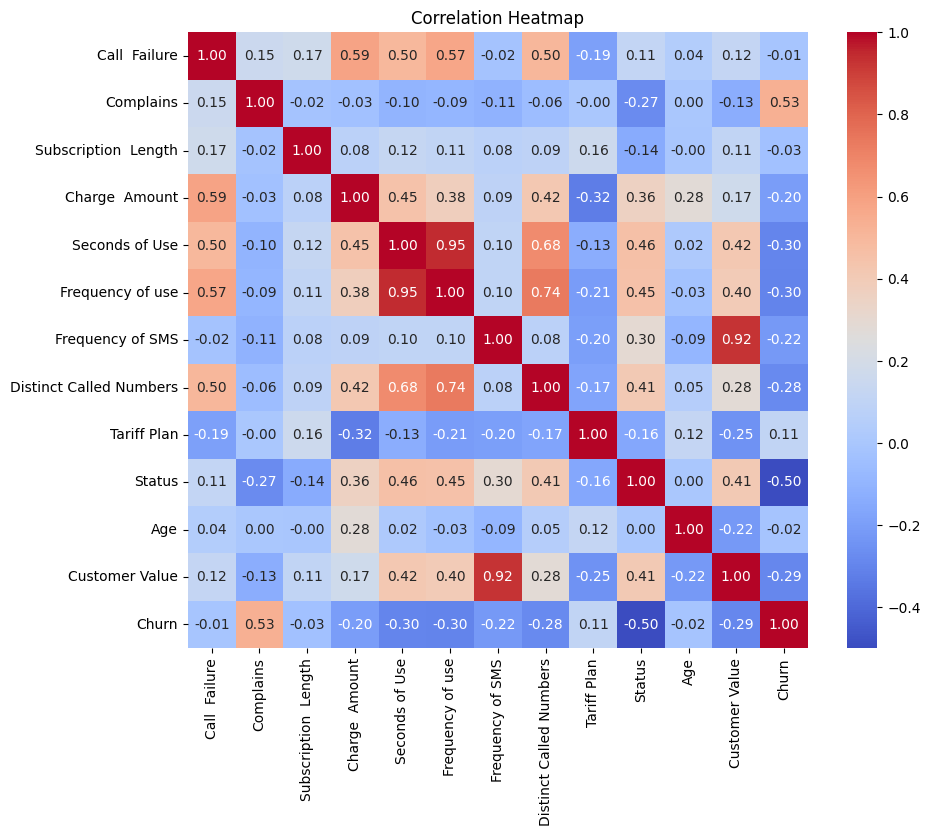

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.35, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.30, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.25, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X, y, test_size=0.20, random_state=42)

train_test_split(60-40)

In [ ]:
#Test_split(40)
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train1, y_train1)
predictions1 = logreg.predict(X_test1)
print(predictions1)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test1, predictions1)
z

array([[1026,   29],
       [ 169,   36]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,predictions1)

0.8428571428571429

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1055
           1       0.55      0.18      0.27       205

    accuracy                           0.84      1260
   macro avg       0.71      0.57      0.59      1260
weighted avg       0.81      0.84      0.81      1260



train_test_split(65-35)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train2, y_train2)
predictions2 = logreg.predict(X_test2)
print(predictions2)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test2, predictions2)
z

array([[896,  29],
       [145,  33]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,predictions2)

0.8422484134179511

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,predictions2))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       925
           1       0.53      0.19      0.28       178

    accuracy                           0.84      1103
   macro avg       0.70      0.58      0.59      1103
weighted avg       0.81      0.84      0.81      1103



train_test_split(70-30)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train3, y_train3)
predictions3 = logreg.predict(X_test3)
print(predictions3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test3, predictions3)
z

array([[759,  24],
       [133,  29]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,predictions3)

0.8338624338624339

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3,predictions3))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       783
           1       0.55      0.18      0.27       162

    accuracy                           0.83       945
   macro avg       0.70      0.57      0.59       945
weighted avg       0.80      0.83      0.80       945



train_test_split(75-25)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train4, y_train4)
predictions4 = logreg.predict(X_test4)
print(predictions4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test4, predictions4)
z

array([[619,  26],
       [113,  30]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,predictions4)

0.8236040609137056

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test4,predictions4))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       645
           1       0.54      0.21      0.30       143

    accuracy                           0.82       788
   macro avg       0.69      0.58      0.60       788
weighted avg       0.79      0.82      0.79       788



train_test_split(80-20)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train5, y_train5)
predictions5 = logreg.predict(X_test5)
print(predictions5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test5, predictions5)
z

array([[496,  24],
       [ 82,  28]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,predictions5)

0.8317460317460318

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test5,predictions5))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       520
           1       0.54      0.25      0.35       110

    accuracy                           0.83       630
   macro avg       0.70      0.60      0.62       630
weighted avg       0.80      0.83      0.81       630



### KNN

train_test_split(60-40)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=55)

In [ ]:
model.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred1 = model.predict(X_test1)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
1406          0       0
269           0       0
629           0       0
1033          0       0
286           0       0

[1260 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.8492063492063492

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[1034,   21],
       [ 169,   36]])

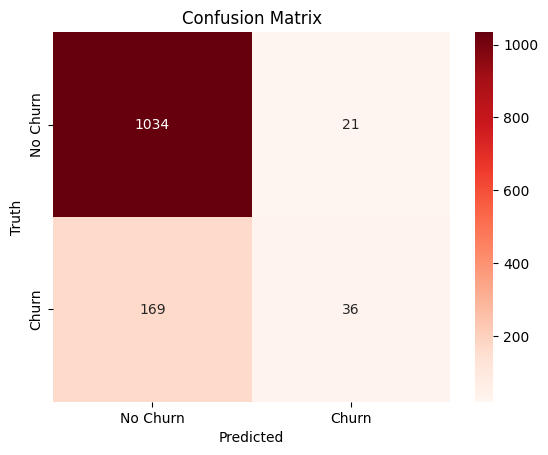

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1055
           1       0.63      0.18      0.27       205

    accuracy                           0.85      1260
   macro avg       0.75      0.58      0.60      1260
weighted avg       0.82      0.85      0.81      1260



train_test_split(65-35)

In [ ]:
model.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred2 = model.predict(X_test2)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2564          0       0
643           0       0
1896          0       0
1283          0       0
669           0       0

[1103 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.8485947416137806

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[912,  13],
       [154,  24]])

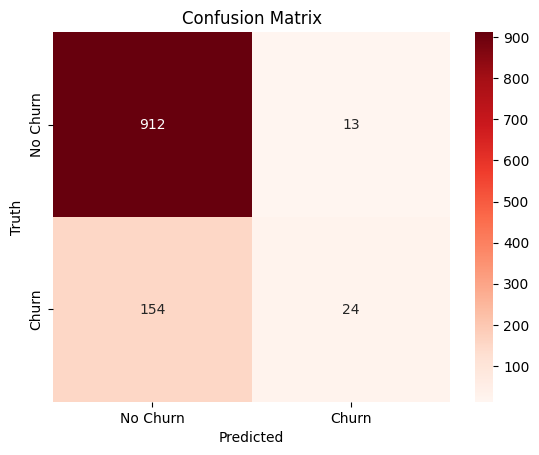

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       925
           1       0.65      0.13      0.22       178

    accuracy                           0.85      1103
   macro avg       0.75      0.56      0.57      1103
weighted avg       0.82      0.85      0.80      1103



train_test_split(70-30)

In [ ]:
model.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred3 = model.predict(X_test3)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
748           0       0
1192          0       0
662           0       0
480           0       0
803           0       0

[945 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8380952380952381

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[770,  13],
       [140,  22]])

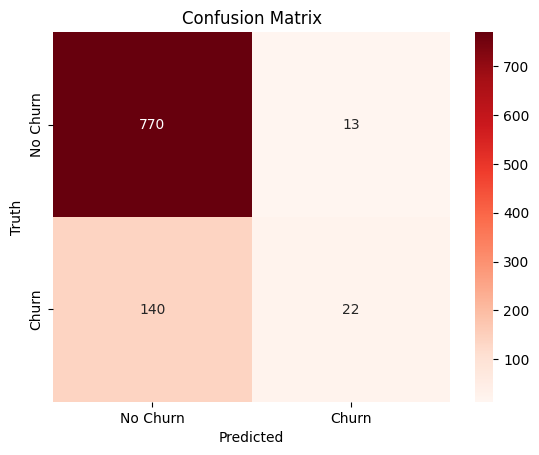

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       783
           1       0.63      0.14      0.22       162

    accuracy                           0.84       945
   macro avg       0.74      0.56      0.57       945
weighted avg       0.81      0.84      0.79       945



train_test_split(75-25)

In [ ]:
model.fit(X_train4, y_train4)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred4 = model.predict(X_test4)
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2328          0       1
798           0       0
1431          0       1
2426          0       1
509           0       0

[788 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8312182741116751

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[634,  11],
       [122,  21]])

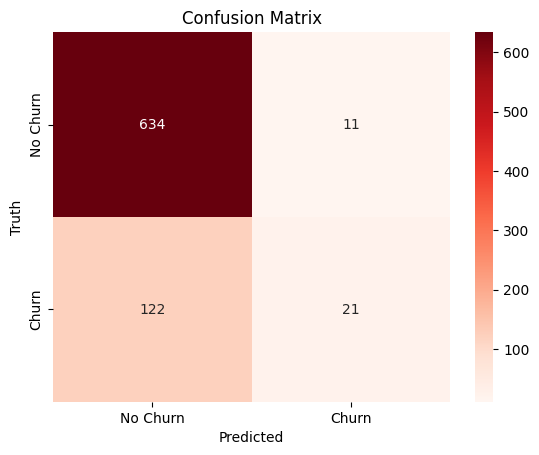

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       645
           1       0.66      0.15      0.24       143

    accuracy                           0.83       788
   macro avg       0.75      0.56      0.57       788
weighted avg       0.81      0.83      0.78       788



train_test_split(80-20)

In [ ]:
model.fit(X_train5, y_train5)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred5 = model.predict(X_test5)
y_pred5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
765           0       0
1041          0       0
790           0       0
2815          0       0
1565          0       0

[630 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,y_pred5)

0.8396825396825397

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test5,y_pred5)
cm

array([[509,  11],
       [ 90,  20]])

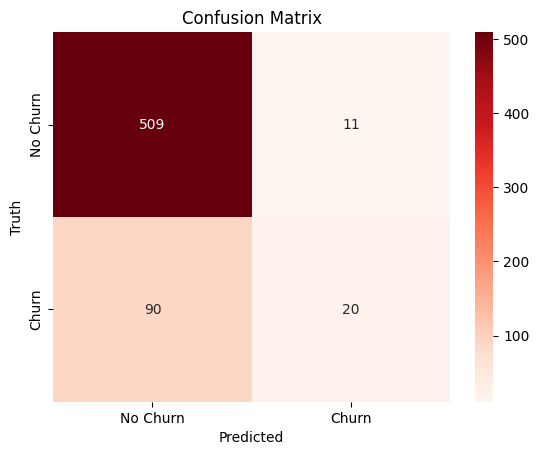

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test5, y_pred5)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       520
           1       0.65      0.18      0.28       110

    accuracy                           0.84       630
   macro avg       0.75      0.58      0.60       630
weighted avg       0.81      0.84      0.80       630



## SVM

train_test_split(60-40)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train1, y_train1)

SVC(kernel='linear')

In [ ]:
y_pred1 = model1.predict(X_test1)

In [ ]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred1,'Actual':y_test1})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
1406          0       0
269           0       0
629           0       0
1033          0       0
286           0       0

[1260 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_pred1)

0.8928571428571429

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1,y_pred1)
cm

array([[1001,   54],
       [  81,  124]])

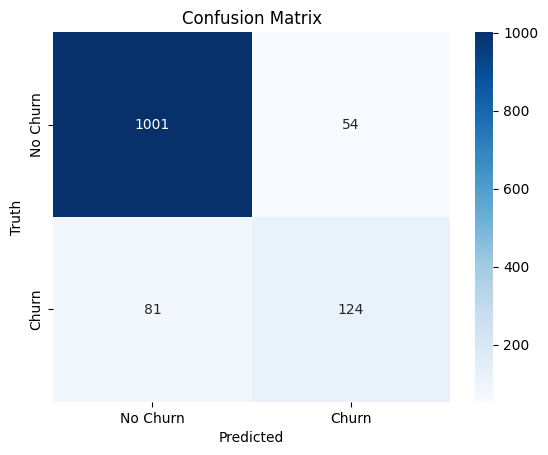

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test1, y_pred1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1055
           1       0.70      0.60      0.65       205

    accuracy                           0.89      1260
   macro avg       0.81      0.78      0.79      1260
weighted avg       0.89      0.89      0.89      1260



train_test_split(65-35)

In [ ]:
model1.fit(X_train2, y_train2)

SVC(kernel='linear')

In [ ]:
y_pred2 = model1.predict(X_test2)

In [ ]:
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred2,'Actual':y_test2})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2564          0       0
643           0       0
1896          0       0
1283          0       0
669           0       0

[1103 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred2)

0.8921124206708976

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,y_pred2)
cm

array([[881,  44],
       [ 75, 103]])

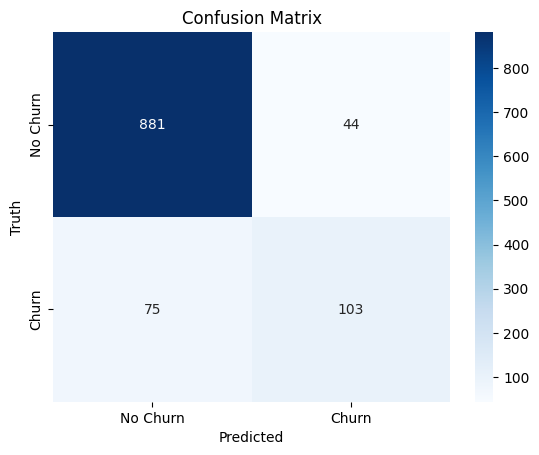

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test2, y_pred2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       925
           1       0.70      0.58      0.63       178

    accuracy                           0.89      1103
   macro avg       0.81      0.77      0.79      1103
weighted avg       0.89      0.89      0.89      1103



train_test_split(70-30)

In [ ]:
model1.fit(X_train3, y_train3)

SVC(kernel='linear')

In [ ]:
y_pred3 = model1.predict(X_test3)

In [ ]:
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred3,'Actual':y_test3})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
748           0       0
1192          0       0
662           0       0
480           0       0
803           0       0

[945 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test3,y_pred3)

0.8888888888888888

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test3,y_pred3)
cm

array([[747,  36],
       [ 69,  93]])

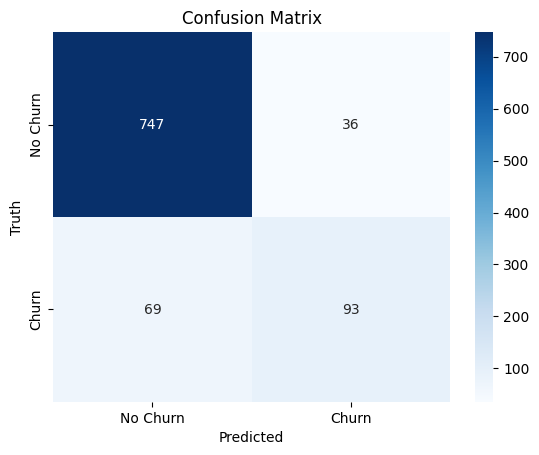

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test3, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       783
           1       0.72      0.57      0.64       162

    accuracy                           0.89       945
   macro avg       0.82      0.76      0.79       945
weighted avg       0.88      0.89      0.88       945



train_test_split(75-25)

In [ ]:
model1.fit(X_train4, y_train4)

SVC(kernel='linear')

In [ ]:
y_pred4 = model1.predict(X_test4)

In [ ]:
y_pred4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred4,'Actual':y_test4})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2328          1       1
798           0       0
1431          1       1
2426          0       1
509           0       0

[788 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test4,y_pred4)

0.8883248730964467

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test4,y_pred4)
cm

array([[616,  29],
       [ 59,  84]])

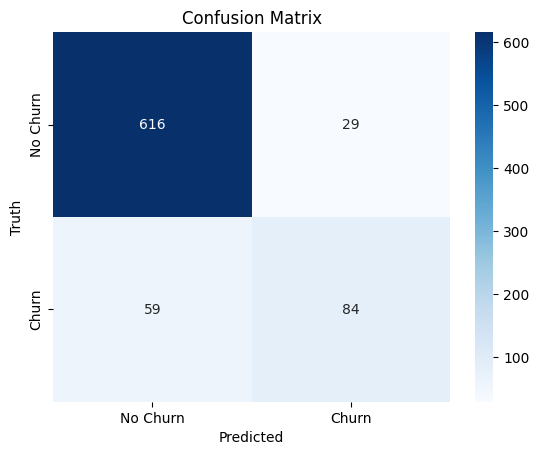

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test4, y_pred4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       645
           1       0.74      0.59      0.66       143

    accuracy                           0.89       788
   macro avg       0.83      0.77      0.79       788
weighted avg       0.88      0.89      0.88       788



train_test_split(80-20)

In [ ]:
model1.fit(X_train5, y_train5)

SVC(kernel='linear')

In [ ]:
y_pred5 = model1.predict(X_test5)

In [ ]:
y_pred5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred5,'Actual':y_test5})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
765           0       0
1041          0       0
790           1       0
2815          0       0
1565          0       0

[630 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test5,y_pred5)

0.8714285714285714

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test5,y_pred5)
cm

array([[487,  33],
       [ 48,  62]])

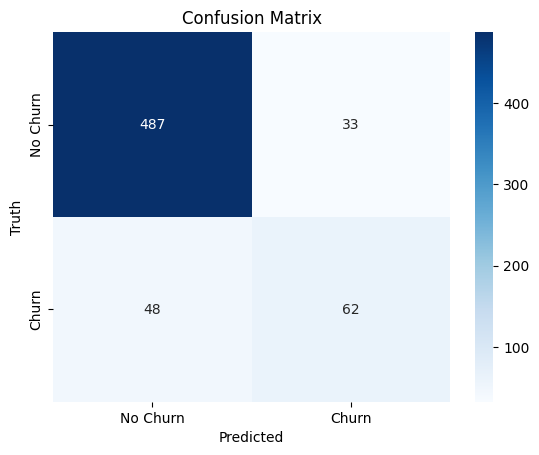

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn","Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test5, y_pred5)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       520
           1       0.65      0.56      0.60       110

    accuracy                           0.87       630
   macro avg       0.78      0.75      0.76       630
weighted avg       0.87      0.87      0.87       630



## Decision_Trees

train_test_split(60-40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train1,y_train1)

In [ ]:
y_pred1 = clf.predict(X_test1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9333333333333333


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8952380952380953


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8952380952380953


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.8952380952380953


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.9166666666666666


In [ ]:
#Predict the response for train dataset
y_pred_train1 = clf.predict(X_train1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train1, y_pred_train1))

Accuracy: 0.9497354497354498


train_test_split(65-35)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train2,y_train2)

In [ ]:
y_pred2 = clf.predict(X_test2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9320036264732547


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8957388939256573


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8957388939256573


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.8893925657298277


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train2,y_train2)

#Predict the response for test dataset
y_pred2 = clf.predict(X_test2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.9202175883952856


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train2, y_pred_train2))

Accuracy: 0.9531021006350757


train_test_split(70-30)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train3,y_train3)

In [ ]:
y_pred3 = clf.predict(X_test3)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9259259259259259


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8878306878306879


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8878306878306879


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.8878306878306879


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train3,y_train3)

#Predict the response for test dataset
y_pred3 = clf.predict(X_test3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

Accuracy: 0.9132275132275133


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf.predict(X_train3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train3, y_pred_train3))

Accuracy: 0.9510204081632653


train_test_split(75-25)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train4,y_train4)

In [ ]:
y_pred4 = clf.predict(X_test4)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.932741116751269


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.883248730964467


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.883248730964467


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.883248730964467


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train4,y_train4)

#Predict the response for test dataset
y_pred4 = clf.predict(X_test4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred4))

Accuracy: 0.9124365482233503


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf.predict(X_train4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train4, y_pred_train4))

Accuracy: 0.9483488569009314


train_test_split(80-20)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train5,y_train5)

In [ ]:
y_pred5 = clf.predict(X_test5)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.9365079365079365


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8793650793650793


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8793650793650793


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8793650793650793


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train5,y_train5)

#Predict the response for test dataset
y_pred5 = clf.predict(X_test5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.8920634920634921


In [ ]:
#Predict the response for train dataset
y_pred_train5 = clf.predict(X_train5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train5, y_pred_train5))

Accuracy: 0.946031746031746


## RandomForest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

train_test_split(60-40)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train1, y_train1)

RandomForestClassifier()

In [ ]:
y_pred1 = rf.predict(X_test1)

In [ ]:
print(classification_report(y_test1, y_pred1))
print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1055
           1       0.88      0.74      0.81       205

    accuracy                           0.94      1260
   macro avg       0.92      0.86      0.89      1260
weighted avg       0.94      0.94      0.94      1260

[[1035   20]
 [  53  152]]


train_test_split(65-35)

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test2)

In [ ]:
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       925
           1       0.82      0.74      0.78       178

    accuracy                           0.93      1103
   macro avg       0.89      0.85      0.87      1103
weighted avg       0.93      0.93      0.93      1103

[[897  28]
 [ 47 131]]


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train2, y_train2)

RandomForestClassifier()

In [ ]:
y_pred2 = rf.predict(X_test2)

In [ ]:
print(classification_report(y_test2, y_pred2))
print(confusion_matrix(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       925
           1       0.90      0.76      0.83       178

    accuracy                           0.95      1103
   macro avg       0.93      0.87      0.90      1103
weighted avg       0.95      0.95      0.95      1103

[[910  15]
 [ 42 136]]


train_test_split(70-30)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train3, y_train3)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test3)

In [ ]:
print(classification_report(y_test3, y_pred3))
print(confusion_matrix(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       783
           1       0.90      0.75      0.82       162

    accuracy                           0.94       945
   macro avg       0.93      0.87      0.89       945
weighted avg       0.94      0.94      0.94       945

[[770  13]
 [ 41 121]]


train_test_split(75-25)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train4, y_train4)

RandomForestClassifier()

In [ ]:
y_pred4 = rf.predict(X_test4)

In [ ]:
print(classification_report(y_test4, y_pred4))
print(confusion_matrix(y_test4, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       645
           1       0.90      0.78      0.84       143

    accuracy                           0.94       788
   macro avg       0.92      0.88      0.90       788
weighted avg       0.94      0.94      0.94       788

[[632  13]
 [ 31 112]]


train_test_split(80-20)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train5, y_train5)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(X_test5)

In [ ]:
print(classification_report(y_test5, y_pred5))
print(confusion_matrix(y_test5, y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       520
           1       0.84      0.77      0.81       110

    accuracy                           0.93       630
   macro avg       0.90      0.87      0.88       630
weighted avg       0.93      0.93      0.93       630

[[504  16]
 [ 25  85]]


### Adaboost

train_test_split(60-40)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostClassifier(n_estimators=50, random_state=42)

model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)

accuracy = accuracy_score(y_test1, y_pred1)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test1, y_pred1))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1055
           1       0.80      0.75      0.77       205

    accuracy                           0.93      1260
   macro avg       0.88      0.86      0.87      1260
weighted avg       0.93      0.93      0.93      1260



train_test_split(65-35)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostClassifier(n_estimators=50, random_state=42)

model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test2, y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       925
           1       0.78      0.70      0.74       178

    accuracy                           0.92      1103
   macro avg       0.86      0.83      0.85      1103
weighted avg       0.92      0.92      0.92      1103



train_test_split(70-30)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostClassifier(n_estimators=50, random_state=42)

model.fit(X_train3, y_train3)

y_pred3 = model.predict(X_test3)

accuracy = accuracy_score(y_test3, y_pred3)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test3, y_pred3))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       783
           1       0.81      0.69      0.75       162

    accuracy                           0.92       945
   macro avg       0.87      0.83      0.85       945
weighted avg       0.92      0.92      0.92       945



train_test_split(75-25)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostClassifier(n_estimators=50, random_state=42)

model.fit(X_train4, y_train4)

y_pred4 = model.predict(X_test4)

accuracy = accuracy_score(y_test4, y_pred4)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test4, y_pred4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       645
           1       0.79      0.72      0.75       143

    accuracy                           0.91       788
   macro avg       0.87      0.84      0.85       788
weighted avg       0.91      0.91      0.91       788



train_test_split(80-20)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

model = AdaBoostClassifier(n_estimators=50, random_state=42)

model.fit(X_train5, y_train5)

y_pred5 = model.predict(X_test5)

accuracy = accuracy_score(y_test5, y_pred5)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test5, y_pred5))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       520
           1       0.78      0.73      0.75       110

    accuracy                           0.92       630
   macro avg       0.86      0.84      0.85       630
weighted avg       0.92      0.92      0.92       630



## XGBoost

train_test_split(60-40)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train1, y_train1)

y_pred1 = model.predict(X_test1)
y_pred1

xg = pd.DataFrame({'Predicted': y_pred1, 'Actual': y_test1})
xg
accuracy1 = accuracy_score(y_test1, y_pred1)
print(f"Set 5 Accuracy: {accuracy1:.2f}")
print(classification_report(y_test1, y_pred1))

Set 5 Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1055
           1       0.90      0.78      0.84       205

    accuracy                           0.95      1260
   macro avg       0.93      0.88      0.90      1260
weighted avg       0.95      0.95      0.95      1260



train_test_split(65-35)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train2, y_train2)

y_pred2 = model.predict(X_test2)
y_pred2

xg = pd.DataFrame({'Predicted': y_pred2, 'Actual': y_test2})
xg
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Set 5 Accuracy: {accuracy2:.2f}")
print(classification_report(y_test2, y_pred2))

Set 5 Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       925
           1       0.89      0.80      0.84       178

    accuracy                           0.95      1103
   macro avg       0.92      0.89      0.91      1103
weighted avg       0.95      0.95      0.95      1103



train_test_split(70-30)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train3, y_train3)

y_pred3 = model.predict(X_test3)
y_pred3

xg = pd.DataFrame({'Predicted': y_pred3, 'Actual': y_test3})
xg
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f"Set 5 Accuracy: {accuracy3:.2f}")
print(classification_report(y_test3, y_pred3))

Set 5 Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       783
           1       0.89      0.81      0.85       162

    accuracy                           0.95       945
   macro avg       0.93      0.89      0.91       945
weighted avg       0.95      0.95      0.95       945



train_test_split(75-25)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train4, y_train4)

y_pred4 = model.predict(X_test4)
y_pred4

xg = pd.DataFrame({'Predicted': y_pred4, 'Actual': y_test4})
xg
accuracy4 = accuracy_score(y_test4, y_pred4)
print(f"Set 5 Accuracy: {accuracy4:.2f}")
print(classification_report(y_test4, y_pred4))

Set 5 Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       645
           1       0.89      0.83      0.86       143

    accuracy                           0.95       788
   macro avg       0.93      0.90      0.91       788
weighted avg       0.95      0.95      0.95       788



train_test_split(80-20)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train5, y_train5)

y_pred5 = model.predict(X_test5)
y_pred5

xg = pd.DataFrame({'Predicted': y_pred5, 'Actual': y_test5})
xg
accuracy5 = accuracy_score(y_test5, y_pred5)
print(f"Set 5 Accuracy: {accuracy5:.2f}")
print(classification_report(y_test5, y_pred5))

Set 5 Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       520
           1       0.88      0.79      0.83       110

    accuracy                           0.94       630
   macro avg       0.92      0.88      0.90       630
weighted avg       0.94      0.94      0.94       630



### ANN

## train_test_split(60-40)






### 1

In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(34, activation='relu'),
                            tf.keras.layers.Dense(24, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train1, y_train1, epochs= 350, verbose=0)

In [ ]:
model.evaluate(X_test1, y_test1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a=recall: 0.6102 - accuracy: 0.9054 - loss: 0.3690 - precision: 0.7867   


[0.38202184438705444,
 0.9142857193946838,
 0.7975460290908813,
 0.6341463327407837]

<Axes: >

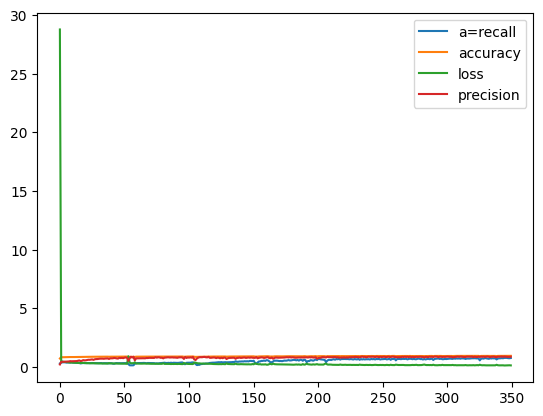

In [ ]:
pd.DataFrame(history.history).plot()

### 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(53, activation='relu'),
                            tf.keras.layers.Dense(47, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train1, y_train1, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test1, y_test1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.3751 - accuracy: 0.8741 - loss: 0.5379 - precision: 0.7667


[0.5935899615287781, 0.8873015642166138, 0.778761088848114, 0.4292683005332947]

<Axes: >

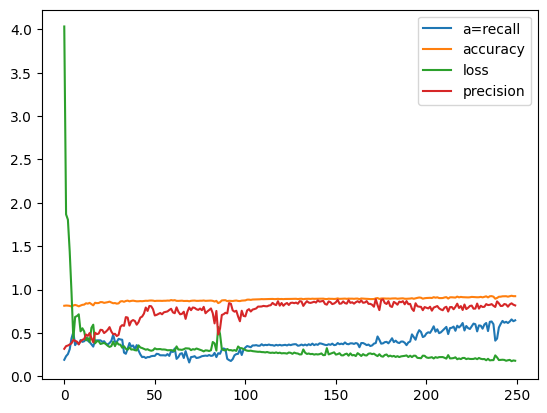

In [ ]:
pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(55, activation='relu'),
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(35, activation='relu'),
                            tf.keras.layers.Dense(25, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train1, y_train1, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test1, y_test1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.4406 - accuracy: 0.8937 - loss: 0.3429 - precision: 0.8675


[0.33964353799819946,
 0.9063491821289062,
 0.8918918967247009,
 0.4829268157482147]

<Axes: >

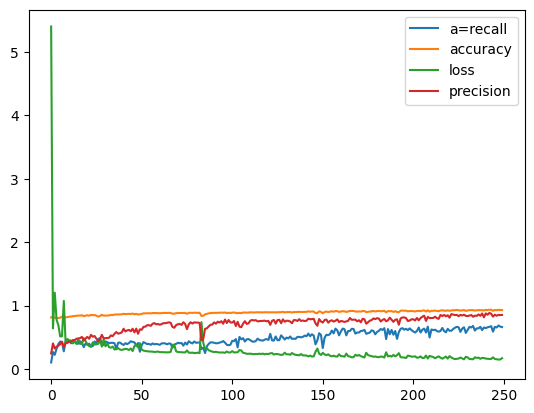

In [ ]:
pd.DataFrame(history.history).plot()

# train_test_split(65-35)

### 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(40, activation='relu'),
                            tf.keras.layers.Dense(40, activation='relu'),
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train2, y_train2, epochs= 100, verbose=0)

In [ ]:
model.evaluate(X_test2, y_test2)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.7098 - accuracy: 0.8920 - loss: 0.2629 - precision: 0.6842


[0.26883918046951294,
 0.8830462098121643,
 0.6161137223243713,
 0.7303370833396912]

<Axes: >

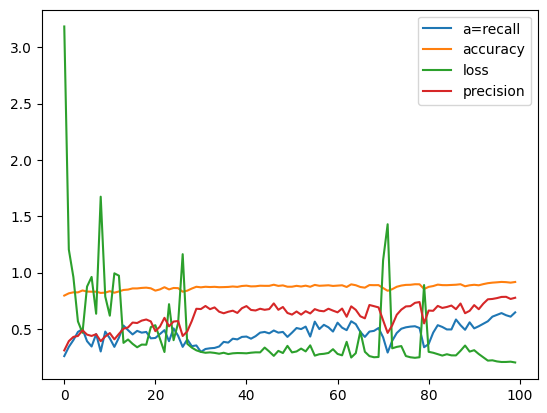

In [ ]:
pd.DataFrame(history.history).plot()

### 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(60, activation='relu'),
                            tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(27, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train2, y_train2, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test2, y_test2)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.7288 - accuracy: 0.9279 - loss: 0.1975 - precision: 0.8302   


[0.18271131813526154,
 0.9392565488815308,
 0.8447204828262329,
 0.7640449404716492]

<Axes: >

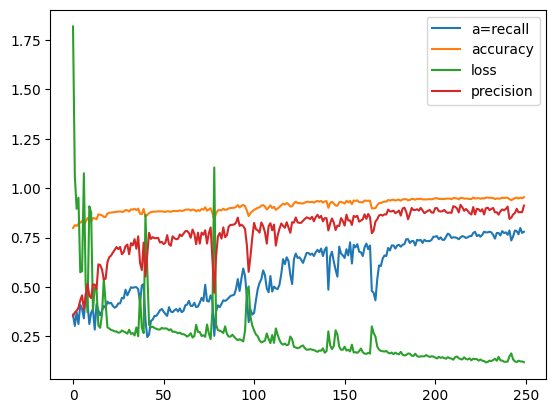

In [ ]:
pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(62, activation='relu'),
                            tf.keras.layers.Dense(58, activation='relu'),
                            tf.keras.layers.Dense(35, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train2, y_train2, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test2, y_test2)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.5945 - accuracy: 0.9073 - loss: 0.2515 - precision: 0.8091


[0.22873623669147491,
 0.9174977540969849,
 0.8270676732063293,
 0.617977499961853]

<Axes: >

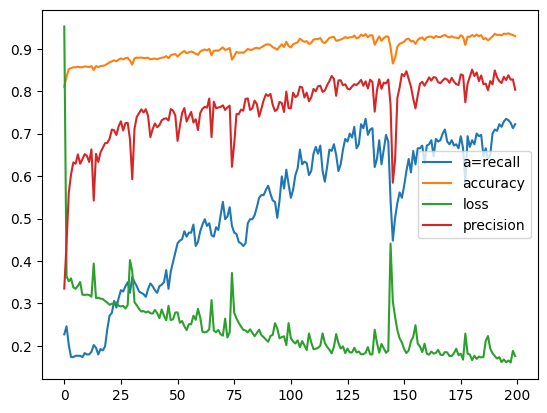

In [ ]:
pd.DataFrame(history.history).plot()

## train_test_split(70-30)

### 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(54, activation='relu'),
                            tf.keras.layers.Dense(39, activation='relu'),
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train3, y_train3, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test3, y_test3)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a=recall: 0.7809 - accuracy: 0.9311 - loss: 0.1859 - precision: 0.8152


[0.18297213315963745,
 0.9248677492141724,
 0.7898089289665222,
 0.7654321193695068]

<Axes: >

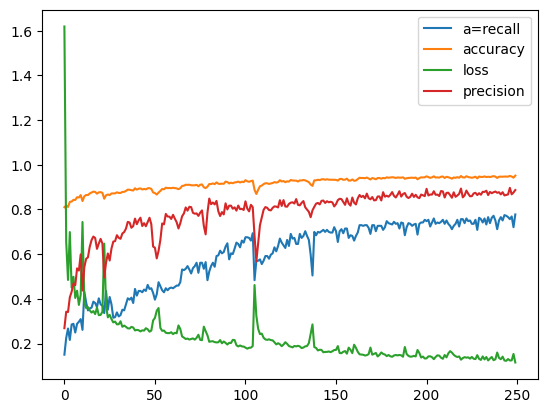

In [ ]:
pd.DataFrame(history.history).plot()

### 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(67, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(37, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train3, y_train3, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test3, y_test3)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a=recall: 0.6461 - accuracy: 0.9108 - loss: 0.2332 - precision: 0.7967


[0.22057048976421356,
 0.9100528955459595,
 0.7984496355056763,
 0.6358024477958679]

<Axes: >

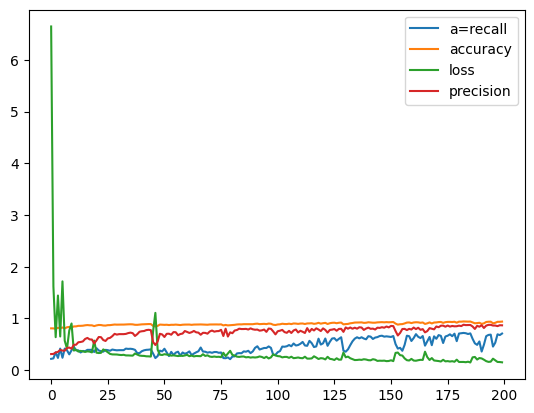

In [ ]:
pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(59, activation='relu'),
                            tf.keras.layers.Dense(46, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train3, y_train3, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test3, y_test3)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.7922 - accuracy: 0.9308 - loss: 0.1761 - precision: 0.8068  


[0.1960018128156662,
 0.9259259104728699,
 0.7875000238418579,
 0.7777777910232544]

<Axes: >

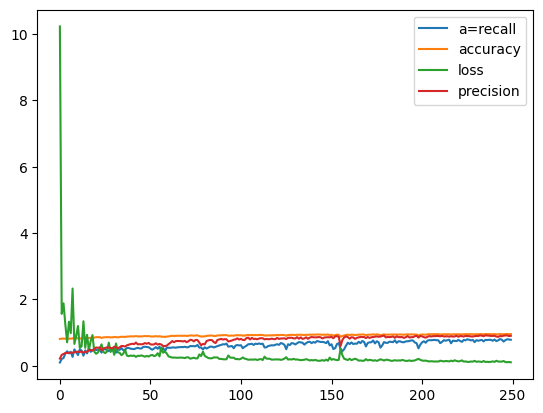

In [ ]:
pd.DataFrame(history.history).plot()

### train_test_split(75-25)

### 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(54, activation='relu'),
                            tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(37, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train4, y_train4, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test4, y_test4)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.7567 - accuracy: 0.9330 - loss: 0.1885 - precision: 0.8403  


[0.19751772284507751,
 0.9302030205726624,
 0.8333333134651184,
 0.7692307829856873]

<Axes: >

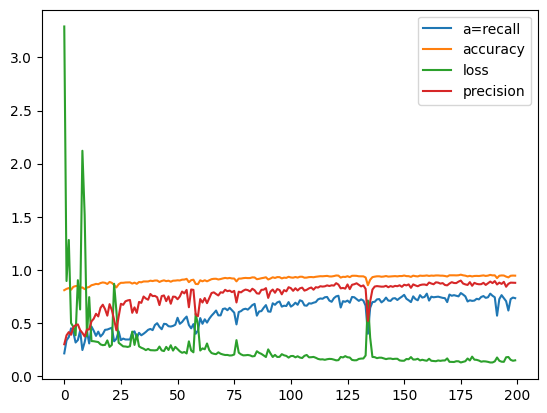

In [ ]:
pd.DataFrame(history.history).plot()

### 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(69, activation='relu'),
                            tf.keras.layers.Dense(58, activation='relu'),
                            tf.keras.layers.Dense(34, activation='relu'),
                            tf.keras.layers.Dense(27, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train4, y_train4, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test4, y_test4)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.6390 - accuracy: 0.9263 - loss: 0.2141 - precision: 0.9031  


[0.21608488261699677,
 0.9289340376853943,
 0.8990825414657593,
 0.6853147149085999]

<Axes: >

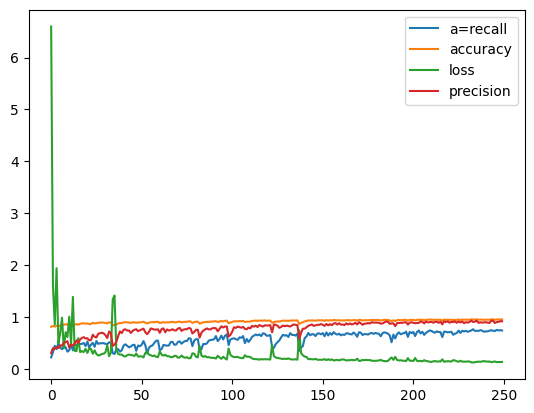

In [ ]:
pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(58, activation='relu'),
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(27, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train4, y_train4, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test4, y_test4)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - a=recall: 0.7023 - accuracy: 0.9299 - loss: 0.1922 - precision: 0.8667


[0.20858561992645264,
 0.9238578677177429,
 0.8547008633613586,
 0.6993007063865662]

<Axes: >

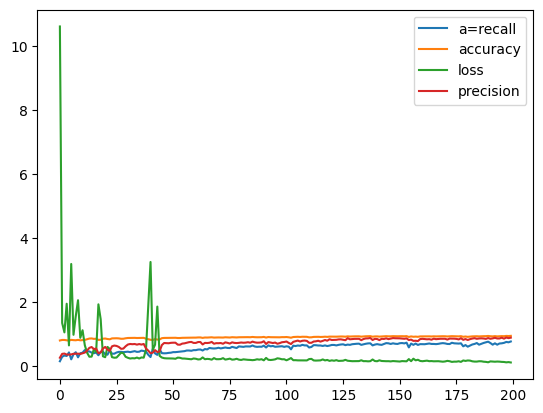

In [ ]:
pd.DataFrame(history.history).plot()

### train_test_split(80-20)

### 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(57, activation='relu'),
                            tf.keras.layers.Dense(53, activation='relu'),
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train5, y_train5, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test5, y_test5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.5106 - accuracy: 0.9011 - loss: 0.2468 - precision: 0.8472  


[0.24807599186897278,
 0.8936507701873779,
 0.8115941882133484,
 0.5090909004211426]

<Axes: >

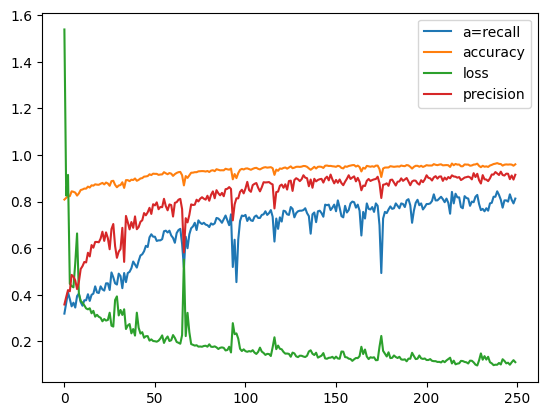

In [ ]:
pd.DataFrame(history.history).plot()

### 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(57, activation='relu'),
                            tf.keras.layers.Dense(52, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(38, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train5, y_train5, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test5, y_test5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - a=recall: 0.5433 - accuracy: 0.9014 - loss: 0.2510 - precision: 0.8161


[0.25900202989578247,
 0.8904761672019958,
 0.7733333110809326,
 0.5272727012634277]

<Axes: >

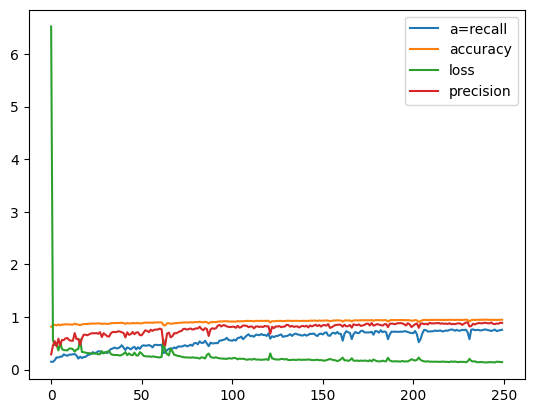

In [ ]:
pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(59, activation='relu'),
                            tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train5, y_train5, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test5, y_test5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - a=recall: 0.4709 - accuracy: 0.8873 - loss: 0.3118 - precision: 0.7841


[0.3363112807273865, 0.8873015642166138, 0.782608687877655, 0.4909090995788574]

<Axes: >

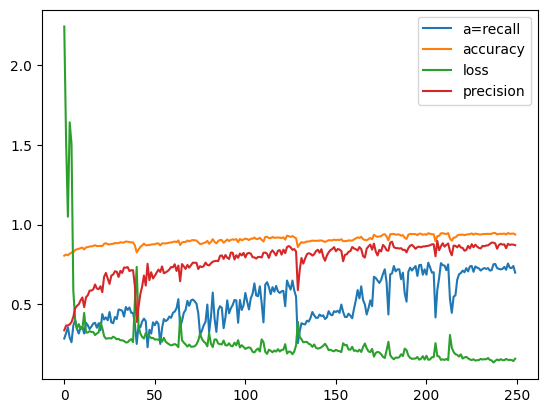

In [ ]:
pd.DataFrame(history.history).plot()

## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i).round(1) for i in range(X.shape[1])]

    return(vif)

calc_vif(X)

variables   VIF
0             Call  Failure   6.1
1                 Complains   1.2
2      Subscription  Length  15.4
3            Charge  Amount   4.4
4            Seconds of Use  38.4
5          Frequency of use  44.3
6          Frequency of SMS  46.2
7   Distinct Called Numbers   6.9
8               Tariff Plan  15.8
9                    Status   6.9
10                      Age  16.8
11           Customer Value  74.2

In [ ]:
calc_vif(X.drop('Customer Value', axis=1))

variables   VIF
0             Call  Failure   6.1
1                 Complains   1.2
2      Subscription  Length  13.3
3            Charge  Amount   4.2
4            Seconds of Use  29.3
5          Frequency of use  44.3
6          Frequency of SMS   1.7
7   Distinct Called Numbers   6.9
8               Tariff Plan  15.8
9                    Status   6.5
10                      Age  12.5

In [ ]:
calc_vif(X.drop(['Customer Value','Frequency of use'], axis=1))

variables   VIF
0            Call  Failure   4.4
1                Complains   1.2
2     Subscription  Length  13.1
3           Charge  Amount   3.0
4           Seconds of Use   4.7
5         Frequency of SMS   1.7
6  Distinct Called Numbers   5.9
7              Tariff Plan  14.3
8                   Status   6.0
9                      Age  12.2

In [ ]:
calc_vif(X.drop(['Customer Value','Frequency of use','Tariff Plan'], axis=1))

variables  VIF
0            Call  Failure  4.4
1                Complains  1.2
2     Subscription  Length  9.4
3           Charge  Amount  2.5
4           Seconds of Use  4.7
5         Frequency of SMS  1.6
6  Distinct Called Numbers  5.9
7                   Status  5.7
8                      Age  9.1

In [ ]:
calc_vif(X.drop(['Customer Value','Frequency of use','Tariff Plan','Subscription  Length'], axis=1))

variables  VIF
0            Call  Failure  4.1
1                Complains  1.2
2           Charge  Amount  2.3
3           Seconds of Use  4.7
4         Frequency of SMS  1.6
5  Distinct Called Numbers  5.9
6                   Status  5.6
7                      Age  4.1

In [ ]:
calc_vif(X.drop(['Customer Value','Frequency of use','Tariff Plan','Subscription  Length','Distinct Called Numbers'], axis=1))

variables  VIF
0     Call  Failure  3.8
1         Complains  1.2
2    Charge  Amount  2.3
3    Seconds of Use  3.7
4  Frequency of SMS  1.6
5            Status  5.3
6               Age  4.0

In [ ]:
calc_vif(X.drop(['Customer Value','Frequency of use','Tariff Plan','Subscription  Length','Distinct Called Numbers','Status'], axis=1))

variables  VIF
0     Call  Failure  3.7
1         Complains  1.2
2    Charge  Amount  2.3
3    Seconds of Use  3.0
4  Frequency of SMS  1.4
5               Age  2.6

In [ ]:
X_nomulti = X.drop(['Customer Value','Frequency of use','Tariff Plan','Subscription  Length','Distinct Called Numbers','Status'], axis=1)

In [ ]:
X_train_nomulti1, X_test_nomulti1, y_train_nomulti1, y_test_nomulti1 = train_test_split(X_nomulti, y, test_size=0.40, random_state=42)
X_train_nomulti2, X_test_nomulti2, y_train_nomulti2, y_test_nomulti2 = train_test_split(X_nomulti, y, test_size=0.35, random_state=42)
X_train_nomulti3, X_test_nomulti3, y_train_nomulti3, y_test_nomulti3 = train_test_split(X_nomulti, y, test_size=0.30, random_state=42)
X_train_nomulti4, X_test_nomulti4, y_train_nomulti4, y_test_nomulti4 = train_test_split(X_nomulti, y, test_size=0.25, random_state=42)
X_train_nomulti5, X_test_nomulti5, y_train_nomulti5, y_test_nomulti5 = train_test_split(X_nomulti, y, test_size=0.20, random_state=42)

# logistic regression




train_test_split(60-40)

In [ ]:
#Test_split(40)
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train_nomulti1, y_train_nomulti1)
predictions1 = logreg.predict(X_test_nomulti1)
print(predictions1)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
z=confusion_matrix(y_test_nomulti1, predictions1)
z

array([[1045,   10],
       [ 125,   80]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti1,predictions1)

0.8928571428571429

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_nomulti1,predictions1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1055
           1       0.89      0.39      0.54       205

    accuracy                           0.89      1260
   macro avg       0.89      0.69      0.74      1260
weighted avg       0.89      0.89      0.87      1260



train_test_split(65-35)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train_nomulti2, y_train_nomulti2)
predictions2 = logreg.predict(X_test_nomulti2)
print(predictions2)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test_nomulti2, predictions2)
z

array([[900,  25],
       [110,  68]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti2,predictions2)

0.8776065276518585

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_nomulti2,predictions2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       925
           1       0.73      0.38      0.50       178

    accuracy                           0.88      1103
   macro avg       0.81      0.68      0.72      1103
weighted avg       0.87      0.88      0.86      1103



train_test_split(70-30)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train_nomulti3, y_train_nomulti3)
predictions3 = logreg.predict(X_test_nomulti3)
print(predictions3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test_nomulti3, predictions3)
z

array([[775,   8],
       [ 95,  67]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti3,predictions3)

0.891005291005291

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_nomulti3,predictions3))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       783
           1       0.89      0.41      0.57       162

    accuracy                           0.89       945
   macro avg       0.89      0.70      0.75       945
weighted avg       0.89      0.89      0.87       945



train_test_split(75-25)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train_nomulti4, y_train_nomulti4)
predictions4 = logreg.predict(X_test_nomulti4)
print(predictions4)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test_nomulti4, predictions4)
z

array([[638,   7],
       [ 83,  60]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti4,predictions4)

0.8857868020304569

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_nomulti4,predictions4))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       645
           1       0.90      0.42      0.57       143

    accuracy                           0.89       788
   macro avg       0.89      0.70      0.75       788
weighted avg       0.89      0.89      0.87       788



train_test_split(80-20)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train_nomulti5, y_train_nomulti5)
predictions5 = logreg.predict(X_test_nomulti5)
print(predictions5)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
z=confusion_matrix(y_test_nomulti5, predictions5)
z

array([[513,   7],
       [ 68,  42]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti5,predictions5)

0.8809523809523809

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_nomulti5,predictions5))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       520
           1       0.86      0.38      0.53       110

    accuracy                           0.88       630
   macro avg       0.87      0.68      0.73       630
weighted avg       0.88      0.88      0.86       630



# KNN

train_test_split(60-40)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=55)

In [ ]:
model.fit(X_train_nomulti1, y_train_nomulti1)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred_nomulti1 = model.predict(X_test_nomulti1)
y_pred_nomulti1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred_nomulti1,'Actual':y_test_nomulti1})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
1406          0       0
269           0       0
629           0       0
1033          0       0
286           0       0

[1260 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti1,y_pred_nomulti1)

0.8507936507936508

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti1,y_pred_nomulti1)
cm

array([[1037,   18],
       [ 170,   35]])

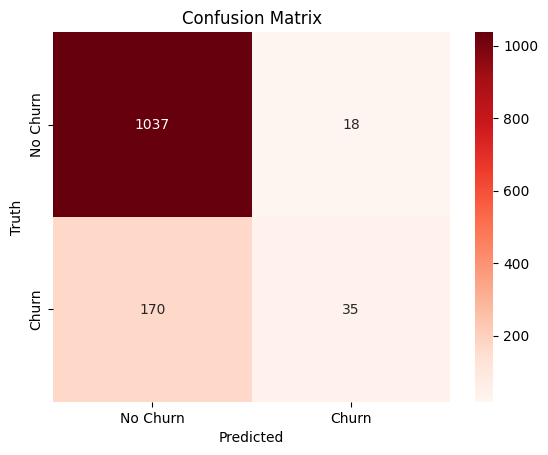

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti1, y_pred_nomulti1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1055
           1       0.66      0.17      0.27       205

    accuracy                           0.85      1260
   macro avg       0.76      0.58      0.59      1260
weighted avg       0.83      0.85      0.81      1260



train_test_split(65-35)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=55)

In [ ]:
model.fit(X_train_nomulti2, y_train_nomulti2)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred_nomulti2 = model.predict(X_test_nomulti2)
y_pred_nomulti2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred_nomulti2,'Actual':y_test_nomulti2})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2564          0       0
643           0       0
1896          0       0
1283          0       0
669           0       0

[1103 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti2,y_pred_nomulti2)

0.8504079782411604

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti2,y_pred_nomulti2)
cm

array([[913,  12],
       [153,  25]])

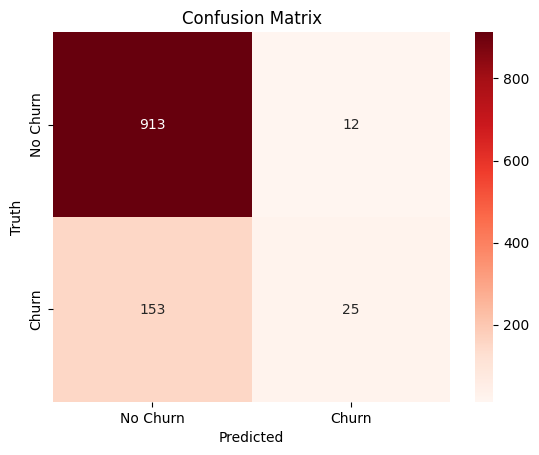

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti2, y_pred_nomulti2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       925
           1       0.68      0.14      0.23       178

    accuracy                           0.85      1103
   macro avg       0.77      0.56      0.57      1103
weighted avg       0.83      0.85      0.81      1103



train_test_split(70-30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=55)

In [ ]:
model.fit(X_train_nomulti3, y_train_nomulti3)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred_nomulti3 = model.predict(X_test_nomulti3)
y_pred_nomulti3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred_nomulti3,'Actual':y_test_nomulti3})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
748           0       0
1192          0       0
662           0       0
480           0       0
803           0       0

[945 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti3,y_pred_nomulti3)

0.8423280423280424

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti3,y_pred_nomulti3)
cm

array([[772,  11],
       [138,  24]])

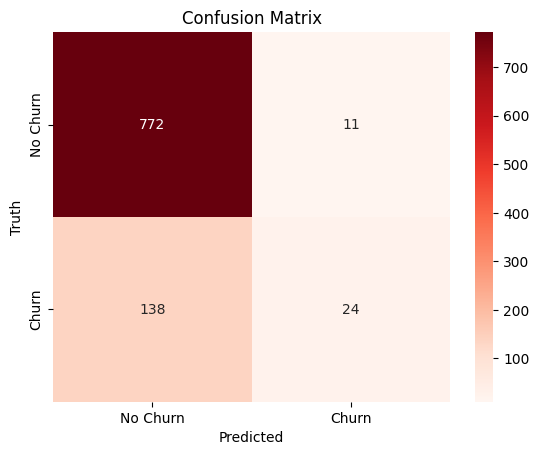

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti3, y_pred_nomulti3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       783
           1       0.69      0.15      0.24       162

    accuracy                           0.84       945
   macro avg       0.77      0.57      0.58       945
weighted avg       0.82      0.84      0.80       945



train_test_split(75-25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=55)

In [ ]:
model.fit(X_train_nomulti4, y_train_nomulti4)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred_nomulti4 = model.predict(X_test_nomulti4)
y_pred_nomulti4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred_nomulti4,'Actual':y_test_nomulti4})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2328          0       1
798           0       0
1431          0       1
2426          0       1
509           0       0

[788 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti4,y_pred_nomulti4)

0.833756345177665

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti4,y_pred_nomulti4)
cm

array([[634,  11],
       [120,  23]])

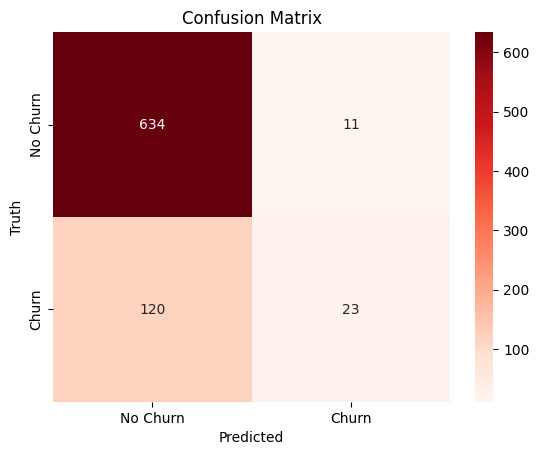

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti4, y_pred_nomulti4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       645
           1       0.68      0.16      0.26       143

    accuracy                           0.83       788
   macro avg       0.76      0.57      0.58       788
weighted avg       0.81      0.83      0.79       788



train_test_split(80-20)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model=KNeighborsClassifier(n_neighbors=55)

In [ ]:
model.fit(X_train_nomulti5, y_train_nomulti5)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
y_pred_nomulti5 = model.predict(X_test_nomulti5)
y_pred_nomulti5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
knn = pd.DataFrame({'Predicted':y_pred_nomulti5,'Actual':y_test_nomulti5})
knn

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
765           0       0
1041          0       0
790           0       0
2815          0       0
1565          0       0

[630 rows x 2 columns]

Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti5,y_pred_nomulti5)

0.8412698412698413

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti5,y_pred_nomulti5)
cm

array([[509,  11],
       [ 89,  21]])

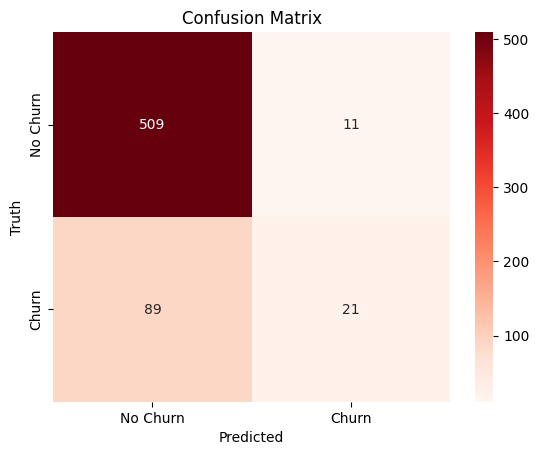

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()


In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti5, y_pred_nomulti5)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       520
           1       0.66      0.19      0.30       110

    accuracy                           0.84       630
   macro avg       0.75      0.58      0.60       630
weighted avg       0.82      0.84      0.80       630



## SVM

train_test_split(60-40)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train_nomulti1, y_train_nomulti1)

SVC(kernel='linear')

In [ ]:
y_pred_nomulti1 = model1.predict(X_test_nomulti1)

In [ ]:
y_pred_nomulti1

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred_nomulti1,'Actual':y_test_nomulti1})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
1406          0       0
269           0       0
629           0       0
1033          0       0
286           0       0

[1260 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti1,y_pred_nomulti1)

0.8857142857142857

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti1,y_pred_nomulti1)
cm

array([[988,  67],
       [ 77, 128]])

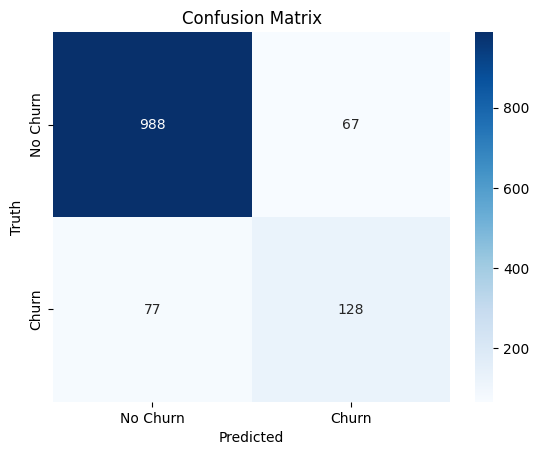

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti1, y_pred_nomulti1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1055
           1       0.66      0.62      0.64       205

    accuracy                           0.89      1260
   macro avg       0.79      0.78      0.79      1260
weighted avg       0.88      0.89      0.88      1260



train_test_split(65-35)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train_nomulti2, y_train_nomulti2)

SVC(kernel='linear')

In [ ]:
y_pred_nomulti2 = model1.predict(X_test_nomulti2)

In [ ]:
y_pred_nomulti2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred_nomulti2,'Actual':y_test_nomulti2})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2564          0       0
643           0       0
1896          0       0
1283          0       0
669           0       0

[1103 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti2,y_pred_nomulti2)

0.8848594741613781

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti2,y_pred_nomulti2)
cm

array([[871,  54],
       [ 73, 105]])

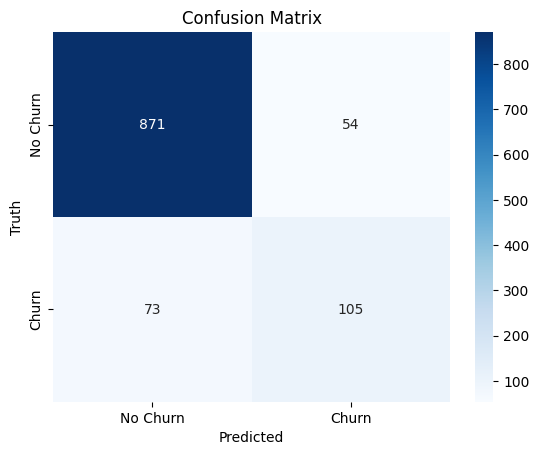

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti2, y_pred_nomulti2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       925
           1       0.66      0.59      0.62       178

    accuracy                           0.88      1103
   macro avg       0.79      0.77      0.78      1103
weighted avg       0.88      0.88      0.88      1103



train_test_split(70-30)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train_nomulti3, y_train_nomulti3)

SVC(kernel='linear')

In [ ]:
y_pred_nomulti3 = model1.predict(X_test_nomulti3)

In [ ]:
y_pred_nomulti3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred_nomulti3,'Actual':y_test_nomulti3})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
748           0       0
1192          0       0
662           0       0
480           0       0
803           0       0

[945 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti3,y_pred_nomulti3)

0.8825396825396825

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti3,y_pred_nomulti3)
cm

array([[740,  43],
       [ 68,  94]])

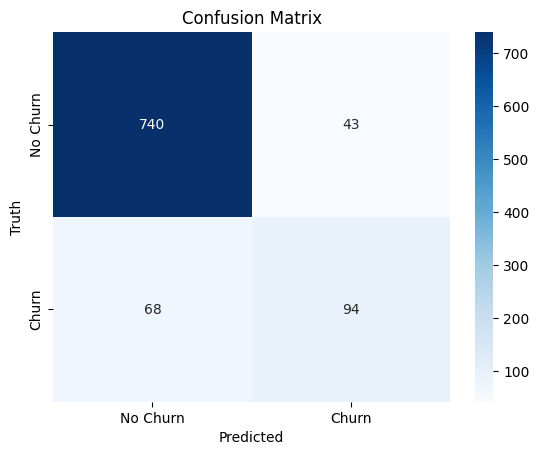

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti3, y_pred_nomulti3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       783
           1       0.69      0.58      0.63       162

    accuracy                           0.88       945
   macro avg       0.80      0.76      0.78       945
weighted avg       0.88      0.88      0.88       945



train_test_split(75-25)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train_nomulti4, y_train_nomulti4)

SVC(kernel='linear')

In [ ]:
y_pred_nomulti4 = model1.predict(X_test_nomulti4)

In [ ]:
y_pred_nomulti4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred_nomulti4,'Actual':y_test_nomulti4})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
2328          1       1
798           0       0
1431          1       1
2426          0       1
509           0       0

[788 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti4,y_pred_nomulti4)

0.8807106598984772

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti4,y_pred_nomulti4)
cm

array([[609,  36],
       [ 58,  85]])

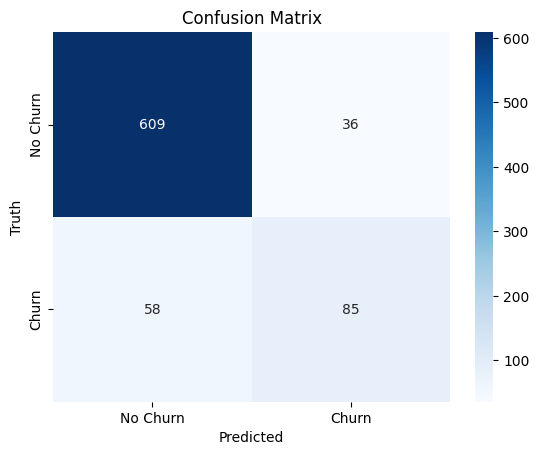

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti4, y_pred_nomulti4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       645
           1       0.70      0.59      0.64       143

    accuracy                           0.88       788
   macro avg       0.81      0.77      0.79       788
weighted avg       0.87      0.88      0.88       788



train_test_split(80-20)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model1 = SVC(kernel='linear')

In [ ]:
model1.fit(X_train_nomulti5, y_train_nomulti5)

SVC(kernel='linear')

In [ ]:
y_pred_nomulti5 = model1.predict(X_test_nomulti5)

In [ ]:
y_pred_nomulti5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
svm = pd.DataFrame({'Predicted':y_pred_nomulti5,'Actual':y_test_nomulti5})
svm

Predicted  Actual
2965          0       0
969           0       0
1385          0       0
1233          0       0
2996          0       0
...         ...     ...
765           0       0
1041          0       0
790           1       0
2815          0       0
1565          0       0

[630 rows x 2 columns]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_nomulti5,y_pred_nomulti5)

0.861904761904762

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_nomulti5,y_pred_nomulti5)
cm

array([[484,  36],
       [ 51,  59]])

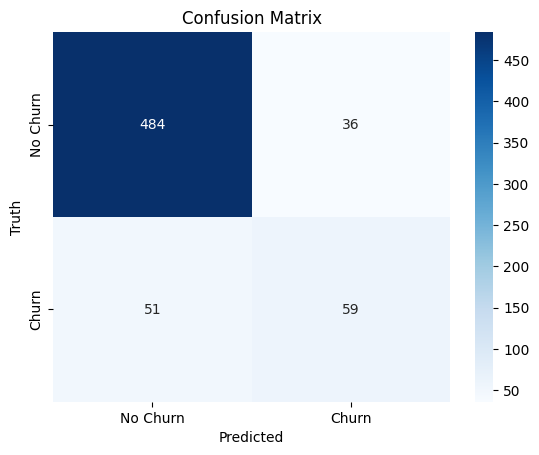

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title('Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test_nomulti5, y_pred_nomulti5)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       520
           1       0.62      0.54      0.58       110

    accuracy                           0.86       630
   macro avg       0.76      0.73      0.75       630
weighted avg       0.86      0.86      0.86       630



### Decision_Trees

train_test_split(60-40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_nomulti1,y_train_nomulti1)

In [ ]:
y_pred_nomulti1 = clf.predict(X_test_nomulti1)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_nomulti1, y_pred_nomulti1))

Accuracy: 0.9103174603174603


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti1,y_train_nomulti1)

#Predict the response for test dataset
y_pred_nomulti1 = clf.predict(X_test_nomulti1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti1, y_pred_nomulti1))

Accuracy: 0.8984126984126984


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti1,y_train_nomulti1)

#Predict the response for test dataset
y_pred_nomulti1 = clf.predict(X_test_nomulti1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti1, y_pred_nomulti1))

Accuracy: 0.8952380952380953


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti1,y_train_nomulti1)

#Predict the response for test dataset
y_pred_nomulti1 = clf.predict(X_test_nomulti1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti1, y_pred_nomulti1))

Accuracy: 0.8992063492063492


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti1,y_train_nomulti1)

#Predict the response for test dataset
y_pred_nomulti1 = clf.predict(X_test_nomulti1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti1, y_pred_nomulti1))

Accuracy: 0.9023809523809524


In [ ]:
#Predict the response for train dataset
y_pred_train1 = clf.predict(X_train_nomulti1)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_nomulti1, y_pred_train1))

Accuracy: 0.9216931216931217


train_test_split(65-35)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_nomulti2,y_train_nomulti2)

In [ ]:
y_pred_nomulti2 = clf.predict(X_test_nomulti2)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_nomulti2, y_pred_nomulti2))

Accuracy: 0.9093381686310064


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti2,y_train_nomulti2)

#Predict the response for test dataset
y_pred_nomulti2 = clf.predict(X_test_nomulti2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti2, y_pred_nomulti2))

Accuracy: 0.899365367180417


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti2,y_train_nomulti2)

#Predict the response for test dataset
y_pred_nomulti2 = clf.predict(X_test_nomulti2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti2, y_pred_nomulti2))

Accuracy: 0.8957388939256573


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti2,y_train_nomulti2)

#Predict the response for test dataset
y_pred_nomulti2 = clf.predict(X_test_nomulti2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti2, y_pred_nomulti2))

Accuracy: 0.899365367180417


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti2,y_train_nomulti2)

#Predict the response for test dataset
y_pred_nomulti2 = clf.predict(X_test_nomulti2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti2, y_pred_nomulti2))

Accuracy: 0.9038984587488668


In [ ]:
#Predict the response for train dataset
y_pred_train2 = clf.predict(X_train_nomulti2)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_nomulti2, y_pred_train2))

Accuracy: 0.9208597948216902


train_test_split(70-30)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_nomulti3,y_train_nomulti3)

In [ ]:
y_pred_nomulti3 = clf.predict(X_test_nomulti3)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_nomulti3, y_pred_nomulti3))

Accuracy: 0.8931216931216931


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti3,y_train_nomulti3)

#Predict the response for test dataset
y_pred_nomulti3 = clf.predict(X_test_nomulti3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti3, y_pred_nomulti3))

Accuracy: 0.891005291005291


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti3,y_train_nomulti3)

#Predict the response for test dataset
y_pred_nomulti3 = clf.predict(X_test_nomulti3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti3, y_pred_nomulti3))

Accuracy: 0.8878306878306879


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti3,y_train_nomulti3)

#Predict the response for test dataset
y_pred_nomulti3 = clf.predict(X_test_nomulti3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti3, y_pred_nomulti3))

Accuracy: 0.891005291005291


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti3,y_train_nomulti3)

#Predict the response for test dataset
y_pred_nomulti3 = clf.predict(X_test_nomulti3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti3, y_pred_nomulti3))

Accuracy: 0.9015873015873016


In [ ]:
#Predict the response for train dataset
y_pred_train3 = clf.predict(X_train_nomulti3)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_nomulti3, y_pred_train3))

Accuracy: 0.9215419501133787


train_test_split(75-25)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_nomulti4,y_train_nomulti4)

In [ ]:
y_pred_nomulti4 = clf.predict(X_test_nomulti4)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_nomulti4, y_pred_nomulti4))

Accuracy: 0.9111675126903553


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti4,y_train_nomulti4)

#Predict the response for test dataset
y_pred_nomulti4 = clf.predict(X_test_nomulti4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti4, y_pred_nomulti4))

Accuracy: 0.8857868020304569


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti4,y_train_nomulti4)

#Predict the response for test dataset
y_pred_nomulti4 = clf.predict(X_test_nomulti4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti4, y_pred_nomulti4))

Accuracy: 0.883248730964467


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti4,y_train_nomulti4)

#Predict the response for test dataset
y_pred_nomulti4 = clf.predict(X_test_nomulti4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti4, y_pred_nomulti4))

Accuracy: 0.8870558375634517


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti4,y_train_nomulti4)

#Predict the response for test dataset
y_pred_nomulti4 = clf.predict(X_test_nomulti4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti4, y_pred4))

Accuracy: 0.950507614213198


In [ ]:
#Predict the response for train dataset
y_pred_train4 = clf.predict(X_train_nomulti4)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_nomulti4, y_pred_train4))

Accuracy: 0.9225232853513972


train_test_split(80-20)

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_nomulti5,y_train_nomulti5)

In [ ]:
y_pred_nomulti5 = clf.predict(X_test_nomulti5)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test_nomulti5, y_pred_nomulti5))

Accuracy: 0.9079365079365079


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti5,y_train_nomulti5)

#Predict the response for test dataset
y_pred_nomulti5 = clf.predict(X_test_nomulti5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti5, y_pred_nomulti5))

Accuracy: 0.8809523809523809


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti5,y_train_nomulti5)

#Predict the response for test dataset
y_pred_nomulti5 = clf.predict(X_test_nomulti5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti5, y_pred_nomulti5))

Accuracy: 0.8793650793650793


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti5,y_train_nomulti5)

#Predict the response for test dataset
y_pred_nomulti5 = clf.predict(X_test_nomulti5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti5, y_pred_nomulti5))

Accuracy: 0.8825396825396825


In [ ]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train_nomulti5,y_train_nomulti5)

#Predict the response for test dataset
y_pred_nomulti5 = clf.predict(X_test_nomulti5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_nomulti5, y_pred_nomulti5))

Accuracy: 0.8841269841269841


In [ ]:
#Predict the response for train dataset
y_pred_train5 = clf.predict(X_train_nomulti5)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train_nomulti5, y_pred_train5))

Accuracy: 0.921031746031746


# RandomForest

train_test_split(60-40)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_nomulti1, y_train_nomulti1)

RandomForestClassifier()

In [ ]:
y_pred_nomulti1 = rf.predict(X_test_nomulti1)

In [ ]:
print(classification_report(y_test_nomulti1, y_pred_nomulti1))
print(confusion_matrix(y_test_nomulti1, y_pred_nomulti1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1055
           1       0.85      0.60      0.70       205

    accuracy                           0.92      1260
   macro avg       0.89      0.79      0.83      1260
weighted avg       0.91      0.92      0.91      1260

[[1033   22]
 [  82  123]]


train_test_split(65-35)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_nomulti2, y_train_nomulti2)

RandomForestClassifier()

In [ ]:
y_pred_nomulti2 = rf.predict(X_test_nomulti2)

In [ ]:
print(classification_report(y_test_nomulti2, y_pred_nomulti2))
print(confusion_matrix(y_test_nomulti2, y_pred_nomulti2))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       925
           1       0.81      0.66      0.72       178

    accuracy                           0.92      1103
   macro avg       0.87      0.81      0.84      1103
weighted avg       0.92      0.92      0.92      1103

[[897  28]
 [ 61 117]]


train_test_split(70-30)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_nomulti3, y_train_nomulti3)

RandomForestClassifier()

In [ ]:
y_pred_nomulti3 = rf.predict(X_test_nomulti3)

In [ ]:
print(classification_report(y_test_nomulti3, y_pred_nomulti3))
print(confusion_matrix(y_test_nomulti3, y_pred_nomulti3))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       783
           1       0.81      0.65      0.72       162

    accuracy                           0.91       945
   macro avg       0.87      0.81      0.83       945
weighted avg       0.91      0.91      0.91       945

[[758  25]
 [ 57 105]]


train_test_split(75-25)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_nomulti4, y_train_nomulti4)

RandomForestClassifier()

In [ ]:
y_pred_nomulti4 = rf.predict(X_test_nomulti4)

In [ ]:
print(classification_report(y_test_nomulti4, y_pred_nomulti4))
print(confusion_matrix(y_test_nomulti4, y_pred_nomulti4))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       645
           1       0.83      0.66      0.74       143

    accuracy                           0.91       788
   macro avg       0.88      0.82      0.84       788
weighted avg       0.91      0.91      0.91       788

[[625  20]
 [ 48  95]]


train_test_split(80-20)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train_nomulti5, y_train_nomulti5)

RandomForestClassifier()

In [ ]:
y_pred_nomulti5 = rf.predict(X_test_nomulti5)

In [ ]:
print(classification_report(y_test_nomulti5, y_pred_nomulti5))
print(confusion_matrix(y_test_nomulti5, y_pred_nomulti5))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       520
           1       0.77      0.68      0.72       110

    accuracy                           0.91       630
   macro avg       0.85      0.82      0.83       630
weighted avg       0.90      0.91      0.91       630

[[497  23]
 [ 35  75]]


### Adaboost

train_test_split(60-40)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [ ]:
model.fit(X_train_nomulti1, y_train_nomulti1)
y_pred_nomulti1 = model.predict(X_test_nomulti1)
accuracy1 = accuracy_score(y_test_nomulti1, y_pred_nomulti1)
print(f"Set 1 Accuracy: {accuracy1:.2f}")
print(classification_report(y_test1, y_pred1))

Set 1 Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1055
           1       0.90      0.78      0.84       205

    accuracy                           0.95      1260
   macro avg       0.93      0.88      0.90      1260
weighted avg       0.95      0.95      0.95      1260



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


train_test_split(65-35)

In [ ]:
model.fit(X_train_nomulti2, y_train_nomulti2)
y_pred_nomulti2 = model.predict(X_test_nomulti2)
accuracy2 = accuracy_score(y_test_nomulti2, y_pred_nomulti2)
print(f"Set 2 Accuracy: {accuracy2:.2f}")
print(classification_report(y_test_nomulti2, y_pred_nomulti2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Set 2 Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       925
           1       0.73      0.57      0.64       178

    accuracy                           0.90      1103
   macro avg       0.83      0.76      0.79      1103
weighted avg       0.89      0.90      0.89      1103



train_test_split(70-30)

In [ ]:
model.fit(X_train_nomulti3, y_train_nomulti3)
y_pred_nomulti3 = model.predict(X_test_nomulti3)
accuracy3 = accuracy_score(y_test_nomulti3, y_pred_nomulti3)
print(f"Set 3 Accuracy: {accuracy3:.2f}")
print(classification_report(y_test_nomulti3, y_pred_nomulti3))

Set 3 Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       783
           1       0.82      0.46      0.59       162

    accuracy                           0.89       945
   macro avg       0.86      0.72      0.76       945
weighted avg       0.89      0.89      0.88       945



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


train_test_split(75-25)

In [ ]:
model.fit(X_train_nomulti4, y_train_nomulti4)
y_pred_nomulti4 = model.predict(X_test_nomulti4)
accuracy4 = accuracy_score(y_test_nomulti4, y_pred_nomulti4)
print(f"Set 4 Accuracy: {accuracy4:.2f}")
print(classification_report(y_test_nomulti4, y_pred_nomulti4))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Set 4 Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       645
           1       0.81      0.52      0.63       143

    accuracy                           0.89       788
   macro avg       0.86      0.75      0.78       788
weighted avg       0.89      0.89      0.88       788



train_test_split(80-20)

In [ ]:
model.fit(X_train_nomulti5, y_train_nomulti5)
y_pred_nomulti5 = model.predict(X_test_nomulti5)
accuracy5 = accuracy_score(y_test_nomulti5, y_pred_nomulti5)
print(f"Set 5 Accuracy: {accuracy5:.2f}")
print(classification_report(y_test_nomulti5, y_pred_nomulti5))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Set 5 Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       520
           1       0.82      0.49      0.61       110

    accuracy                           0.89       630
   macro avg       0.86      0.73      0.78       630
weighted avg       0.89      0.89      0.88       630



# XGBoost

train_test_split(60-40)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train_nomulti1, y_train_nomulti1)

y_pred_nomulti1 = model.predict(X_test_nomulti1)
y_pred_nomulti1

xg = pd.DataFrame({'Predicted': y_pred_nomulti1, 'Actual': y_test_nomulti1})
xg
accuracy1 = accuracy_score(y_test_nomulti1, y_pred_nomulti1)
print(f"Set 5 Accuracy: {accuracy1:.2f}")
print(classification_report(y_test_nomulti1, y_pred_nomulti1))

Set 5 Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1055
           1       0.85      0.62      0.72       205

    accuracy                           0.92      1260
   macro avg       0.89      0.80      0.84      1260
weighted avg       0.92      0.92      0.92      1260



train_test_split(65-35)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train_nomulti2, y_train_nomulti2)

y_pred_nomulti2 = model.predict(X_test_nomulti2)
y_pred_nomulti2

xg = pd.DataFrame({'Predicted': y_pred_nomulti2, 'Actual': y_test_nomulti2})
xg
accuracy2 = accuracy_score(y_test_nomulti2, y_pred_nomulti2)
print(f"Set 5 Accuracy: {accuracy2:.2f}")
print(classification_report(y_test_nomulti2, y_pred_nomulti2))

Set 5 Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       925
           1       0.78      0.70      0.73       178

    accuracy                           0.92      1103
   macro avg       0.86      0.83      0.84      1103
weighted avg       0.92      0.92      0.92      1103



train_test_split(70-30)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train_nomulti3, y_train_nomulti3)

y_pred_nomulti3 = model.predict(X_test_nomulti3)
y_pred_nomulti3

xg = pd.DataFrame({'Predicted': y_pred_nomulti3, 'Actual': y_test_nomulti3})
xg
accuracy3 = accuracy_score(y_test_nomulti3, y_pred_nomulti3)
print(f"Set 5 Accuracy: {accuracy3:.2f}")
print(classification_report(y_test_nomulti3, y_pred_nomulti3))

Set 5 Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       783
           1       0.85      0.62      0.72       162

    accuracy                           0.92       945
   macro avg       0.89      0.80      0.83       945
weighted avg       0.91      0.92      0.91       945



train_test_split(75-25)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train_nomulti4, y_train_nomulti4)

y_pred_nomulti4 = model.predict(X_test_nomulti4)
y_pred_nomulti4

xg = pd.DataFrame({'Predicted': y_pred_nomulti4, 'Actual': y_test_nomulti4})
xg
accuracy4 = accuracy_score(y_test_nomulti4, y_pred_nomulti4)
print(f"Set 5 Accuracy: {accuracy5:.2f}")
print(classification_report(y_test_nomulti4, y_pred_nomulti4))

Set 5 Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       645
           1       0.82      0.71      0.76       143

    accuracy                           0.92       788
   macro avg       0.88      0.84      0.86       788
weighted avg       0.92      0.92      0.92       788



train_test_split(80-20)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier()
model = model.fit(X_train_nomulti5, y_train_nomulti5)

y_pred_nomulti5 = model.predict(X_test_nomulti5)
y_pred_nomulti5

xg = pd.DataFrame({'Predicted': y_pred_nomulti5, 'Actual': y_test_nomulti5})
xg
accuracy5 = accuracy_score(y_test_nomulti5, y_pred_nomulti5)
print(f"Set 5 Accuracy: {accuracy5:.2f}")
print(classification_report(y_test_nomulti5, y_pred_nomulti5))

Set 5 Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       520
           1       0.80      0.73      0.76       110

    accuracy                           0.92       630
   macro avg       0.87      0.84      0.86       630
weighted avg       0.92      0.92      0.92       630



### ANN

### train_test_split(60-40)

### 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(34, activation='relu'),
                            tf.keras.layers.Dense(24, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti1, y_train_nomulti1, epochs= 350, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti1, y_test_nomulti1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - a=recall: 0.2000 - accuracy: 0.8485 - loss: 0.3578 - precision: 0.6839


[0.3288106918334961, 0.8595238327980042, 0.75, 0.2048780471086502]

<Axes: >

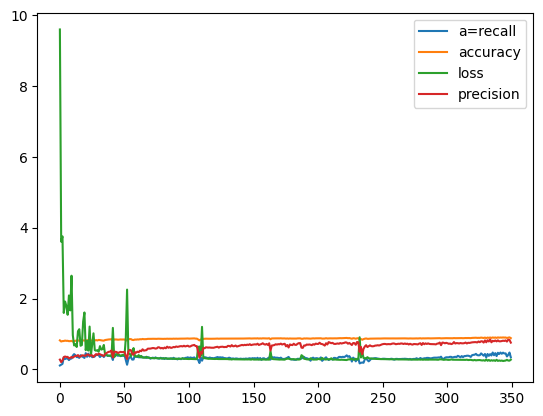

In [ ]:
pd.DataFrame(history.history).plot()

## 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(53, activation='relu'),
                            tf.keras.layers.Dense(47, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti1, y_train_nomulti1, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti1, y_test_nomulti1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.2511 - accuracy: 0.8528 - loss: 0.3363 - precision: 0.6831


[0.32616597414016724,
 0.867460310459137,
 0.7638888955116272,
 0.26829269528388977]

<Axes: >

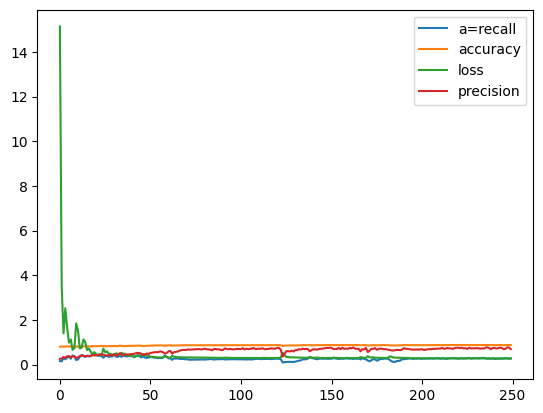

In [ ]:
pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(55, activation='relu'),
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(35, activation='relu'),
                            tf.keras.layers.Dense(25, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti1, y_train_nomulti1, epochs= 450, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti1, y_test_nomulti1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a=recall: 0.1964 - accuracy: 0.8568 - loss: 0.3352 - precision: 0.8229   


[0.3144107758998871,
 0.8682539463043213,
 0.8305084705352783,
 0.23902438580989838]

<Axes: >

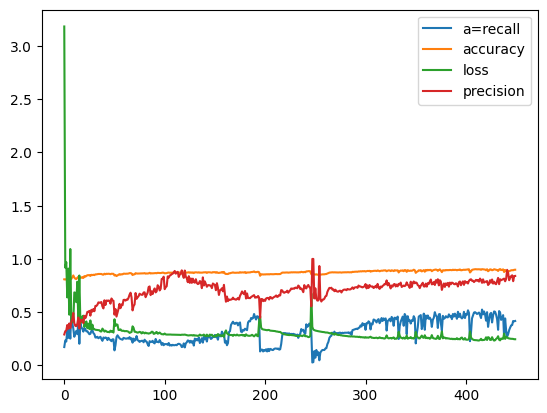

In [ ]:
pd.DataFrame(history.history).plot()

### train_test_split(65-35)

## 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(40, activation='relu'),
                            tf.keras.layers.Dense(40, activation='relu'),
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti2, y_train_nomulti2, epochs= 100, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti2, y_test_nomulti2)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a=recall: 0.2222 - accuracy: 0.8339 - loss: 0.3400 - precision: 0.5310   


[0.3334927260875702,
 0.8449682593345642,
 0.5507246255874634,
 0.21348313987255096]

<Axes: >

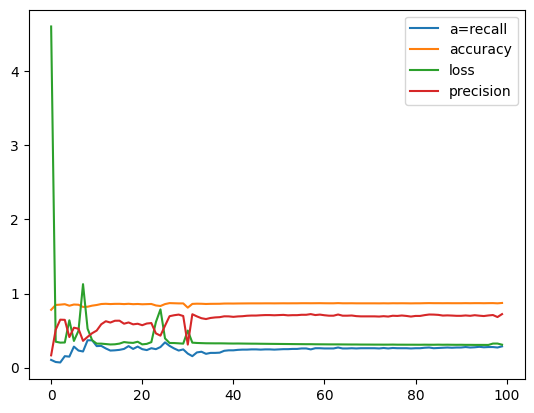

In [ ]:
pd.DataFrame(history.history).plot()

### 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(60, activation='relu'),
                            tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(27, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti2, y_train_nomulti2, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti2, y_test_nomulti2)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a=recall: 0.2470 - accuracy: 0.8467 - loss: 0.3497 - precision: 0.6295   


[0.3316587209701538, 0.8567543029785156, 0.65625, 0.23595505952835083]

<Axes: >

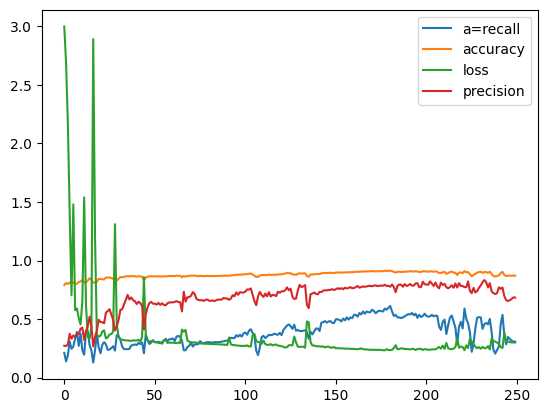

In [ ]:

pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(62, activation='relu'),
                            tf.keras.layers.Dense(58, activation='relu'),
                            tf.keras.layers.Dense(35, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti2, y_train_nomulti2, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti2, y_test_nomulti2)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a=recall: 0.4921 - accuracy: 0.8781 - loss: 0.2811 - precision: 0.7026


[0.2750875651836395,
 0.8902992010116577,
 0.7279999852180481,
 0.5112359523773193]

<Axes: >

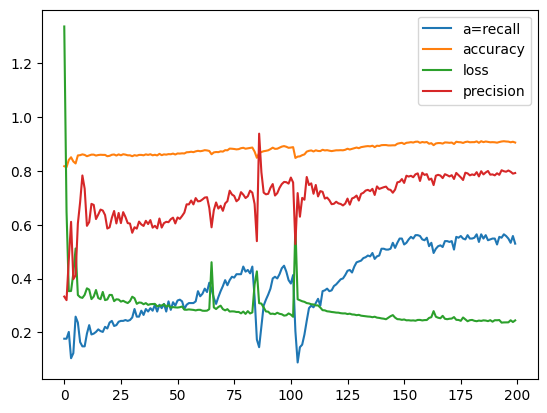

In [ ]:

pd.DataFrame(history.history).plot()

### train_test_split(70-30)

### 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(54, activation='relu'),
                            tf.keras.layers.Dense(39, activation='relu'),
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti3, y_train_nomulti3, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti3, y_test_nomulti3)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.5523 - accuracy: 0.8960 - loss: 0.2637 - precision: 0.7729


[0.27118948101997375,
 0.9015873074531555,
 0.8053097128868103,
 0.5617284178733826]

<Axes: >

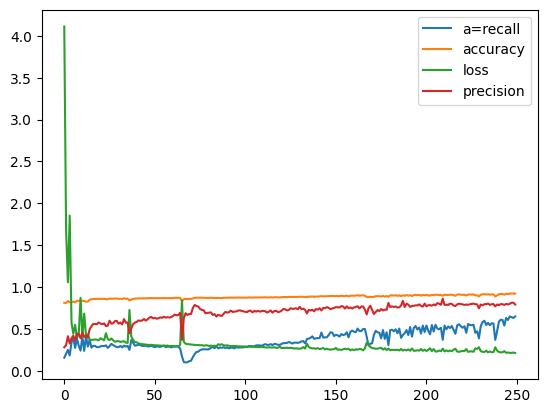

In [ ]:
pd.DataFrame(history.history).plot()

# 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(67, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(37, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti3, y_train_nomulti3, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti3, y_test_nomulti3)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.4234 - accuracy: 0.8789 - loss: 0.2882 - precision: 0.7675


[0.2876768112182617, 0.879365086555481, 0.7553191781044006, 0.4382716119289398]

<Axes: >

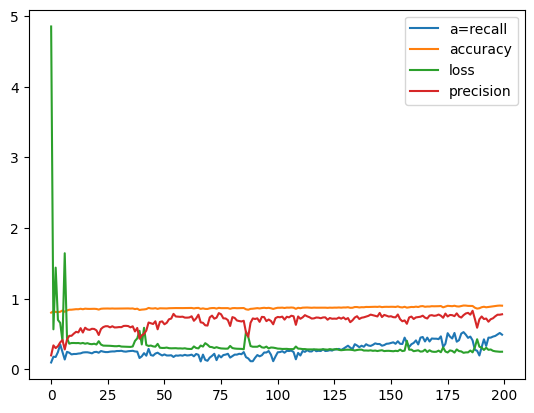

In [ ]:

pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(59, activation='relu'),
                            tf.keras.layers.Dense(46, activation='relu'),
                            tf.keras.layers.Dense(17, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti3, y_train_nomulti3, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti3, y_test_nomulti3)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.5604 - accuracy: 0.8877 - loss: 0.2634 - precision: 0.7198   


[0.27146750688552856,
 0.891005277633667,
 0.7360000014305115,
 0.5679012537002563]

<Axes: >

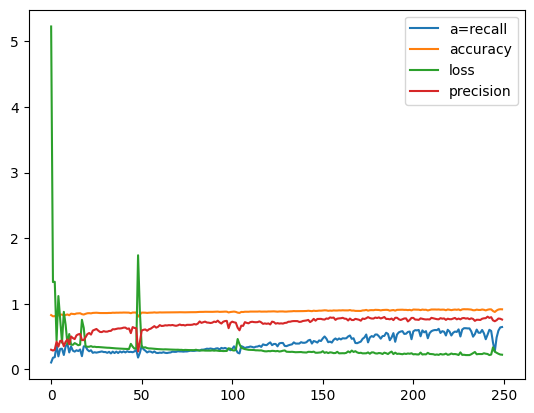

In [ ]:
pd.DataFrame(history.history).plot()

### train_test_split(75-25)

### 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(54, activation='relu'),
                            tf.keras.layers.Dense(50, activation='relu'),
                            tf.keras.layers.Dense(37, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti4, y_train_nomulti4, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti4, y_test_nomulti4)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.4869 - accuracy: 0.8820 - loss: 0.2858 - precision: 0.7325  


[0.294330894947052, 0.8819797039031982, 0.7604166865348816, 0.5104895234107971]

<Axes: >

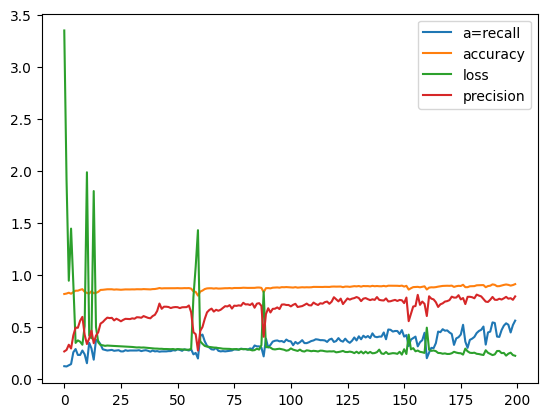

In [ ]:
pd.DataFrame(history.history).plot()

### 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(69, activation='relu'),
                            tf.keras.layers.Dense(58, activation='relu'),
                            tf.keras.layers.Dense(34, activation='relu'),
                            tf.keras.layers.Dense(27, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti4, y_train_nomulti4, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti4, y_test_nomulti4)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.6236 - accuracy: 0.9018 - loss: 0.2842 - precision: 0.7604  


[0.30706143379211426,
 0.8959391117095947,
 0.7652173638343811,
 0.6153846383094788]

<Axes: >

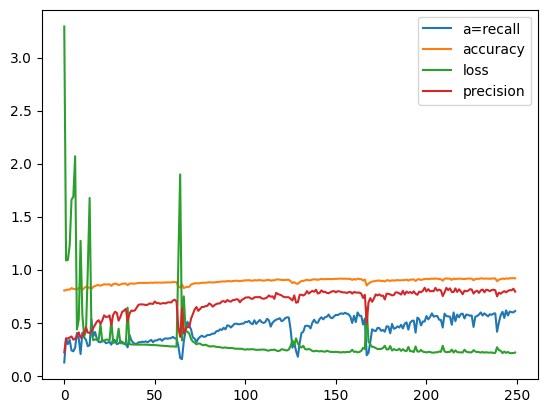

In [ ]:
pd.DataFrame(history.history).plot()

# 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(58, activation='relu'),
                            tf.keras.layers.Dense(30, activation='relu'),
                            tf.keras.layers.Dense(27, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti4, y_train_nomulti4, epochs= 200, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti4, y_test_nomulti4)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.5115 - accuracy: 0.8799 - loss: 0.2851 - precision: 0.7042  


[0.29213404655456543,
 0.8819797039031982,
 0.7358490824699402,
 0.5454545617103577]

<Axes: >

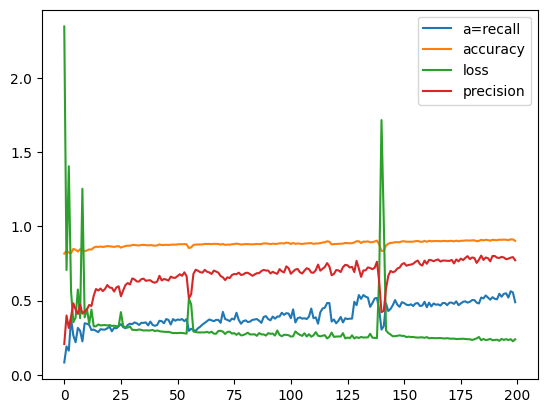

In [ ]:
pd.DataFrame(history.history).plot()

# train_test_split(80-20)

# 1

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(57, activation='relu'),
                            tf.keras.layers.Dense(53, activation='relu'),
                            tf.keras.layers.Dense(45, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti5, y_train_nomulti5, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti5, y_test_nomulti5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.4131 - accuracy: 0.8755 - loss: 0.3453 - precision: 0.7292  


[0.37791165709495544,
 0.8746031522750854,
 0.7313432693481445,
 0.44545453786849976]

<Axes: >

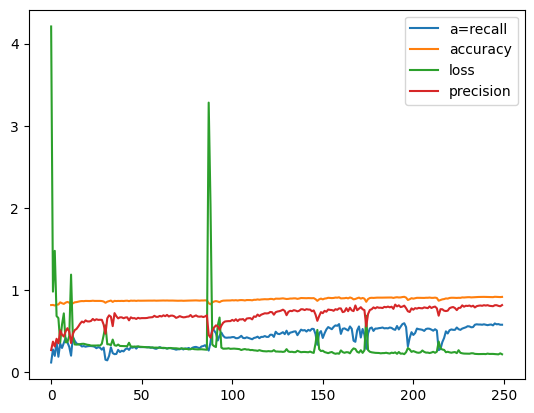

In [ ]:
pd.DataFrame(history.history).plot()

# 2

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(57, activation='relu'),
                            tf.keras.layers.Dense(52, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(38, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti5, y_train_nomulti5, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti5, y_test_nomulti5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.5064 - accuracy: 0.8903 - loss: 0.2918 - precision: 0.7626  


[0.3465324640274048, 0.8809523582458496, 0.7333333492279053, 0.5]

<Axes: >

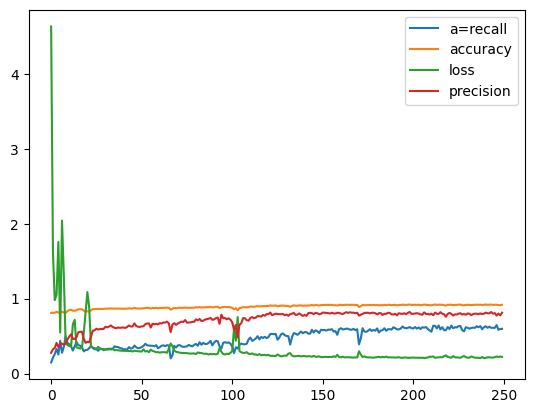

In [ ]:
pd.DataFrame(history.history).plot()

### 3

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([tf.keras.layers.Dense(59, activation='relu'),
                            tf.keras.layers.Dense(56, activation='relu'),
                            tf.keras.layers.Dense(43, activation='relu'),
                            tf.keras.layers.Dense(36, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='a=recall')
              ]
              )

# STEP1: Fit the model

history= model.fit(X_train_nomulti5, y_train_nomulti5, epochs= 250, verbose=0)

In [ ]:
model.evaluate(X_test_nomulti5, y_test_nomulti5)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a=recall: 0.3602 - accuracy: 0.8703 - loss: 0.3120 - precision: 0.7396  


[0.335148423910141, 0.8650793433189392, 0.7358490824699402, 0.3545454442501068]

<Axes: >

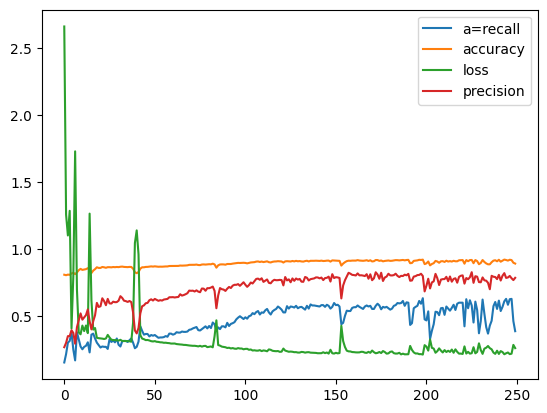

In [ ]:
pd.DataFrame(history.history).plot()